#  Evolvability of Population metric for CMA-ES
This notebook contains a representation of the results presented in the article: [Population Evolvability: Dynamic Fitness Landscape Analysis for Population-Based Metaheuristic Algorithms](https://ieeexplore.ieee.org/document/8016373) for metrics:
- *Evolutionary Probability of Population*
- *Evolutionary Ability of Population*
- *Evolvability of Population*

The algorithm used is CMA-ES for three functions:
- *Sphere*
- *Schwefel*
- *Radar*

## Imports

In [1]:
from math import floor
from math import log

import pandas as pd
from cma import bbobbenchmarks as bn
from ioh import ProblemClass, get_problem

from evp.algos.cmaes import CMAES
from evp.evaluator import EvolvabilityOfPopulationEvaluator
from evp.funcs.radar import radar_function
from evp.strategy import EvolvabilityOfPopulationStrategy
from notebooks.utils import calculate_evaluator_score, plot_function

## Initialize algorithms
To initialize algorithm we will set according to information in the article. For CMA-ES, it is:
- dimension = 30
- population size = 4 + 3 * ln(D)
- lower and upper bound = [-100, 100]
- sigma = 0.3 * (ub - lb)

In [2]:
dim_ = 30
lb_, ub_ = -100, 100
pop_size_ = 4 + floor(3 * log(dim_))
sigma_ = 0.3 * (ub_ - lb_)

For each function we set metric parameters:
- max functions evaluations = 1e4 * 30 / 25
- number of neighbours = 5

In [3]:
maxFEs_ = int(1e4 * 30 / 25)
nNeighbours_ = 5

## Sphere function


In [47]:
f1 = bn.F1(zerof=True, zerox=True)

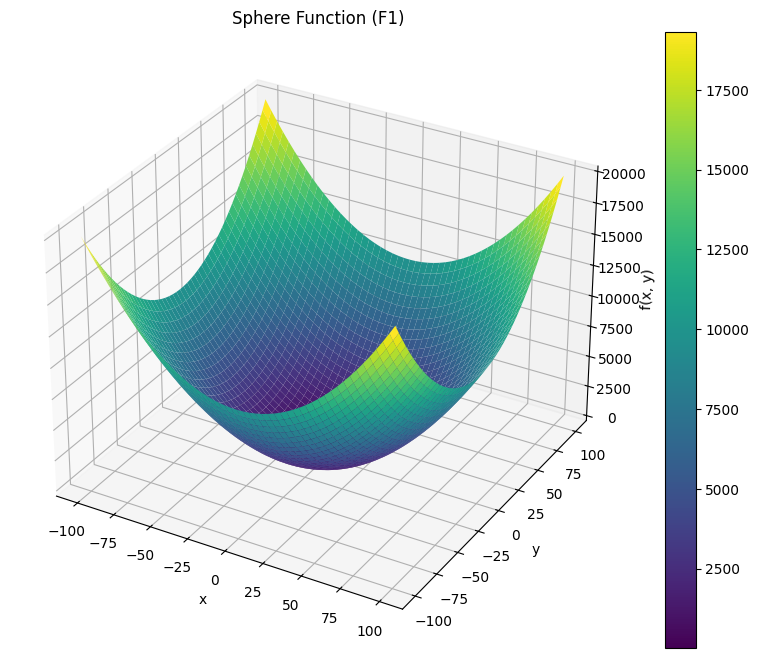

In [48]:
plot_function('Sphere Function (F1)', f1, lb_, ub_)

### Evaluator
In this approach we use standard version of CMA-ES to optimize problem solution

In [49]:
cmaes = CMAES(f1, dim_, sigma_, [lb_, ub_], pop_size_)
evp_evaluator_for_f1 = EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=96652, Thu Dec 12 22:00:57 2024)


100%|██████████| 857/857 [00:20<00:00, 42.46it/s]


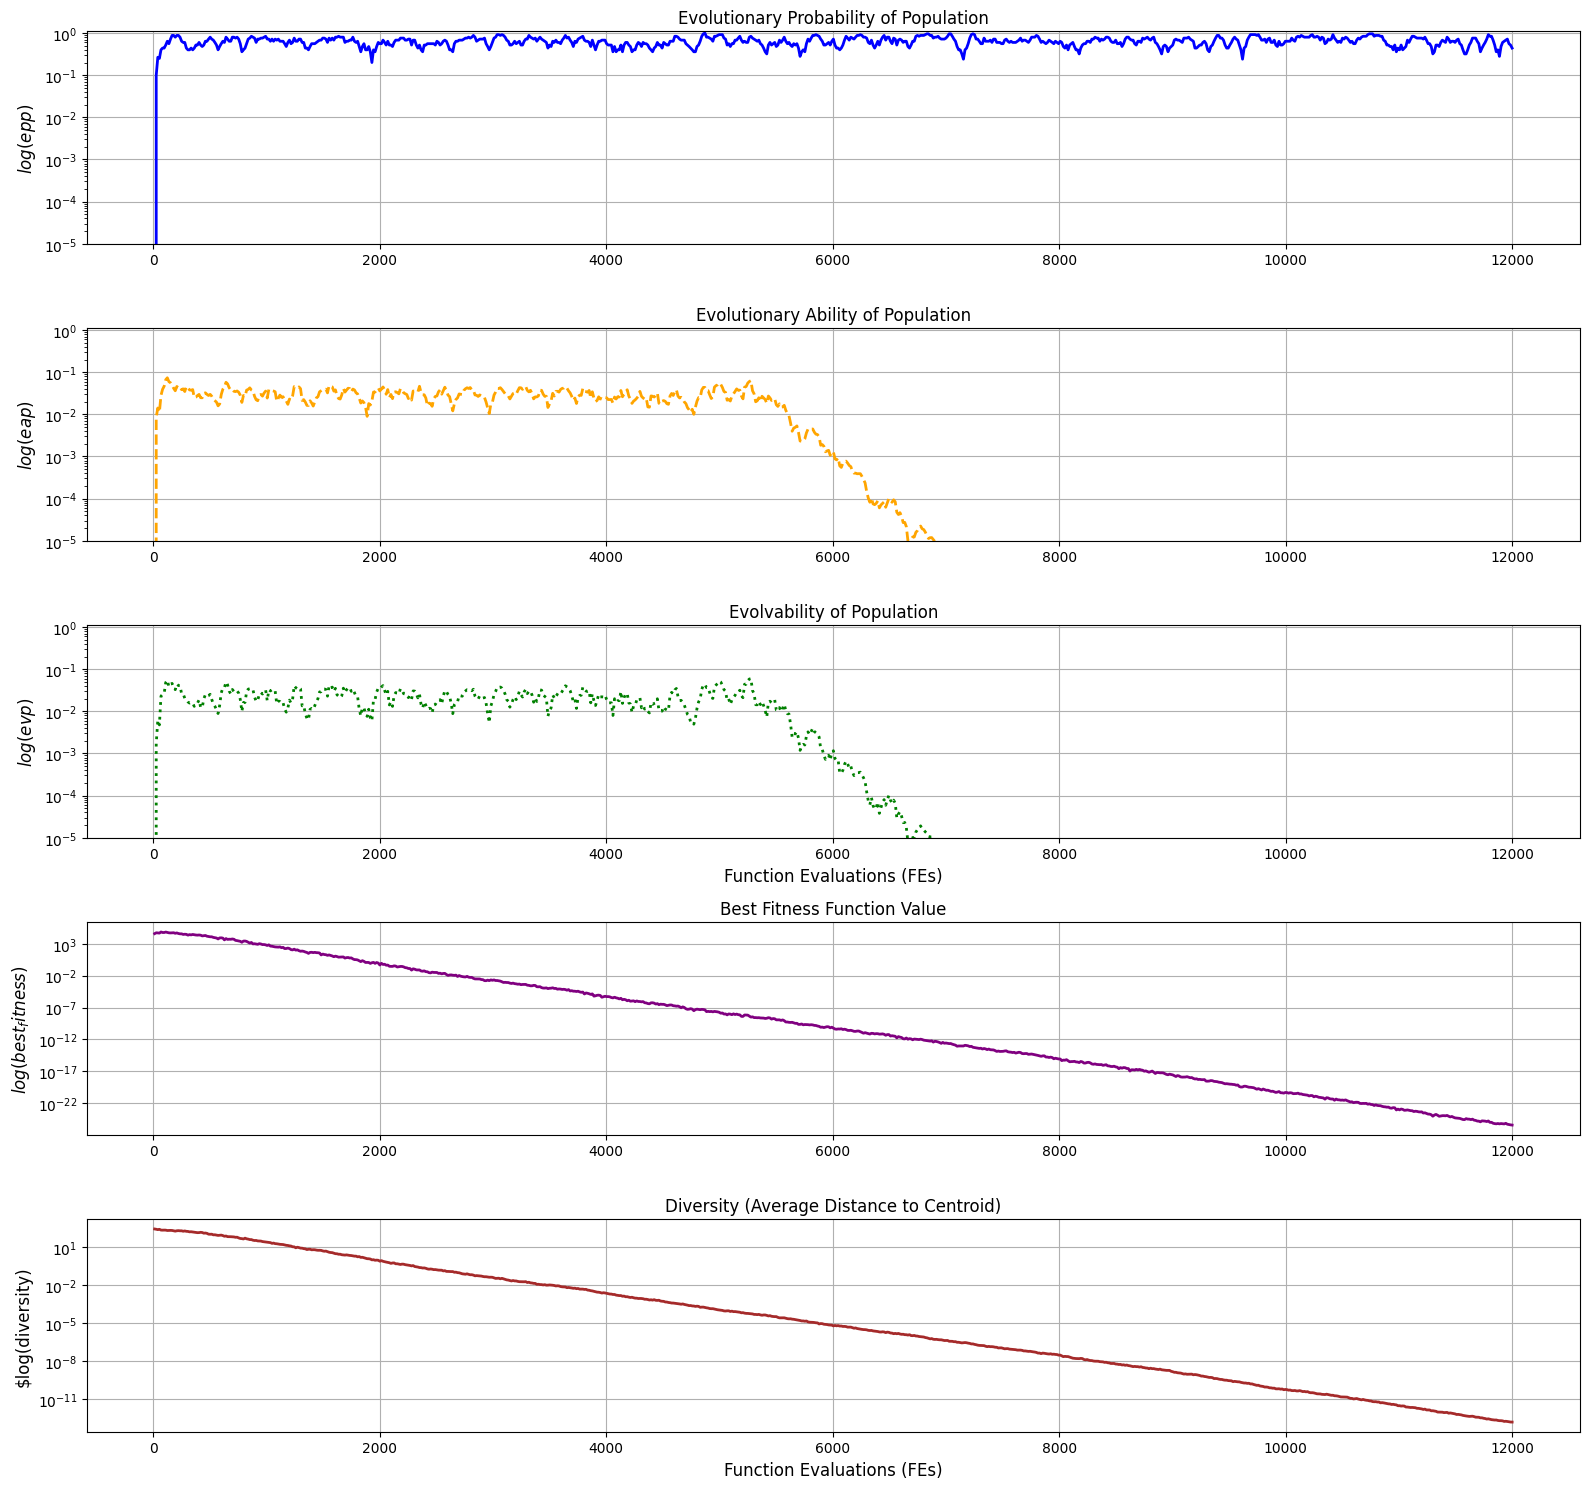

In [50]:
evp_evaluator_for_f1.evaluate(with_plot=True)

#### Parent with neighbours visualizations

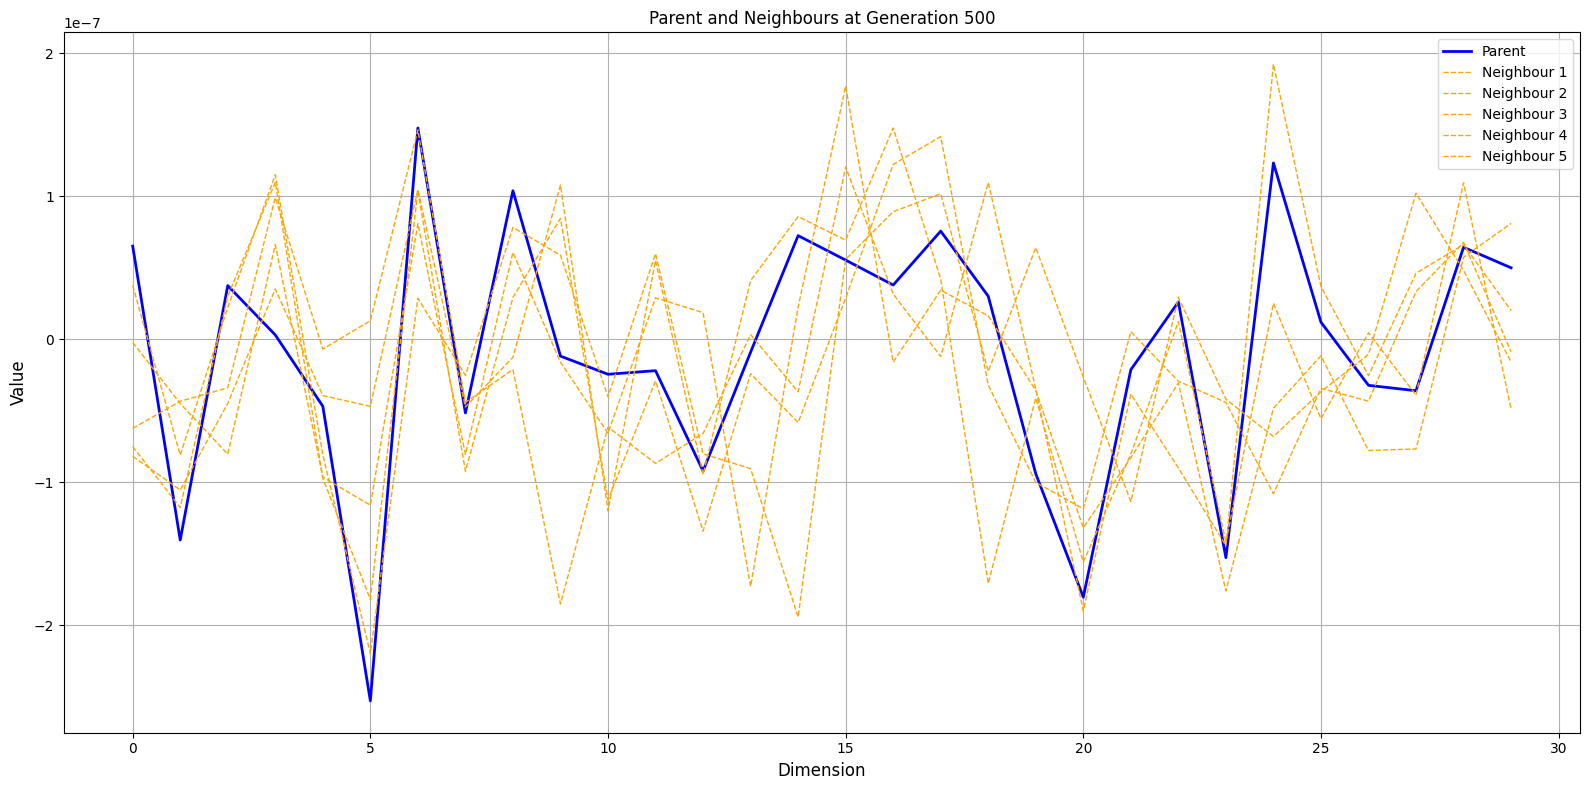

In [51]:
evp_evaluator_for_f1.plot_neighbours_parallel(500)

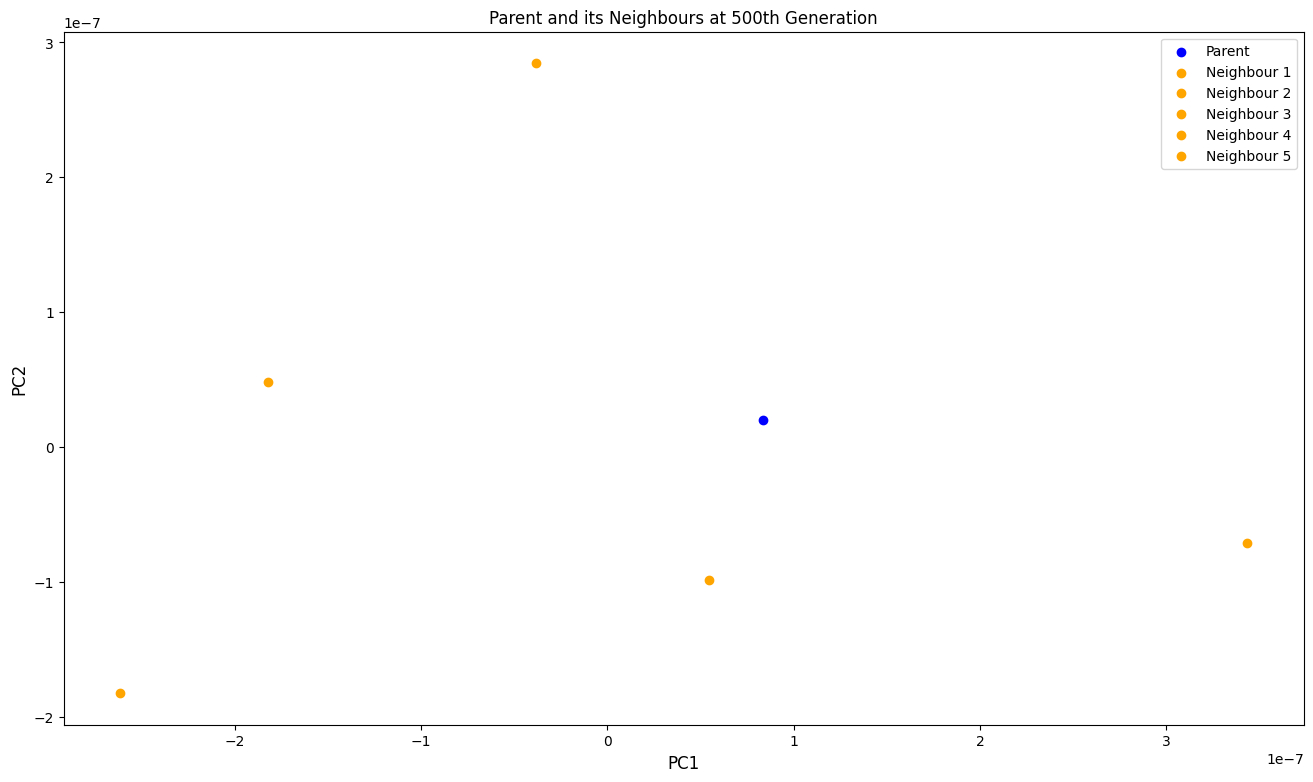

In [52]:
evp_evaluator_for_f1.plot_neighbours_dimensional(500)

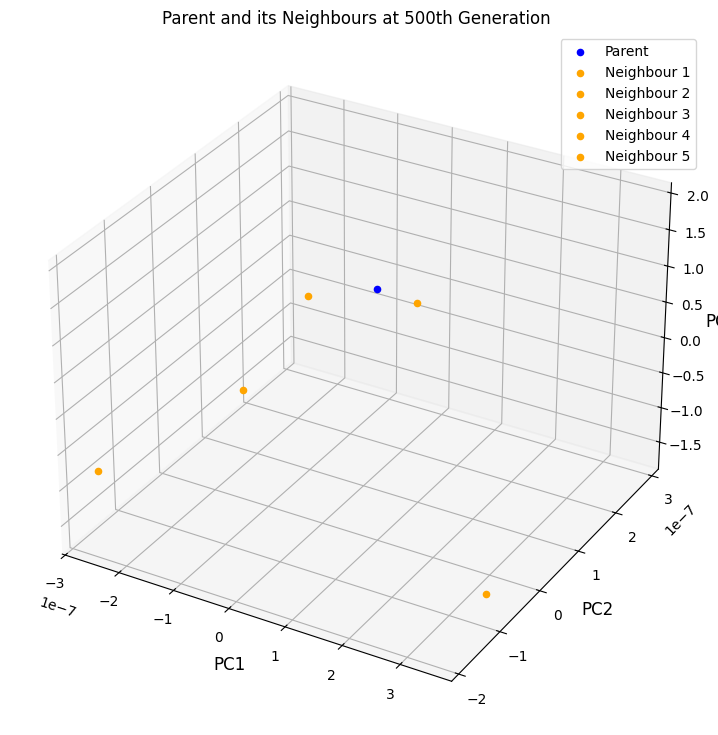

In [53]:
evp_evaluator_for_f1.plot_neighbours_dimensional(500, 3)

#### Score

In [54]:
def get_evaluator():
    cmaes = CMAES(f1, dim_, sigma_, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

In [55]:
evaluator_score_for_f1 = calculate_evaluator_score(get_evaluator)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=73812, Thu Dec 12 22:01:20 2024)


100%|██████████| 857/857 [00:20<00:00, 42.39it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=97560, Thu Dec 12 22:01:40 2024)


100%|██████████| 857/857 [00:17<00:00, 48.16it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=126374, Thu Dec 12 22:01:58 2024)


100%|██████████| 857/857 [00:17<00:00, 48.56it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=182911, Thu Dec 12 22:02:15 2024)


100%|██████████| 857/857 [00:19<00:00, 44.94it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=192207, Thu Dec 12 22:02:34 2024)


100%|██████████| 857/857 [00:17<00:00, 48.03it/s]


In [56]:
evaluator_score_for_f1

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0  1.700114e-26       1.591067e-25      2.239597e-25                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy
We can enable detecting changes in the evp metric values using Kolmogorov-Smirnov Windowing method. If drifts is detected, algorithm is restarted.


In [57]:
cmaes = CMAES(f1, dim_, sigma_, [lb_, ub_], pop_size_)
evp_strategy_for_f1 = EvolvabilityOfPopulationStrategy(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=135974, Thu Dec 12 22:02:52 2024)


In [58]:
evp_strategy_for_f1.evaluate()

 49%|████▉     | 420/857 [00:10<00:08, 53.18it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=134799, Thu Dec 12 22:03:03 2024)


 96%|█████████▋| 825/857 [00:19<00:00, 52.76it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=147386, Thu Dec 12 22:03:12 2024)


100%|██████████| 857/857 [00:19<00:00, 42.92it/s]


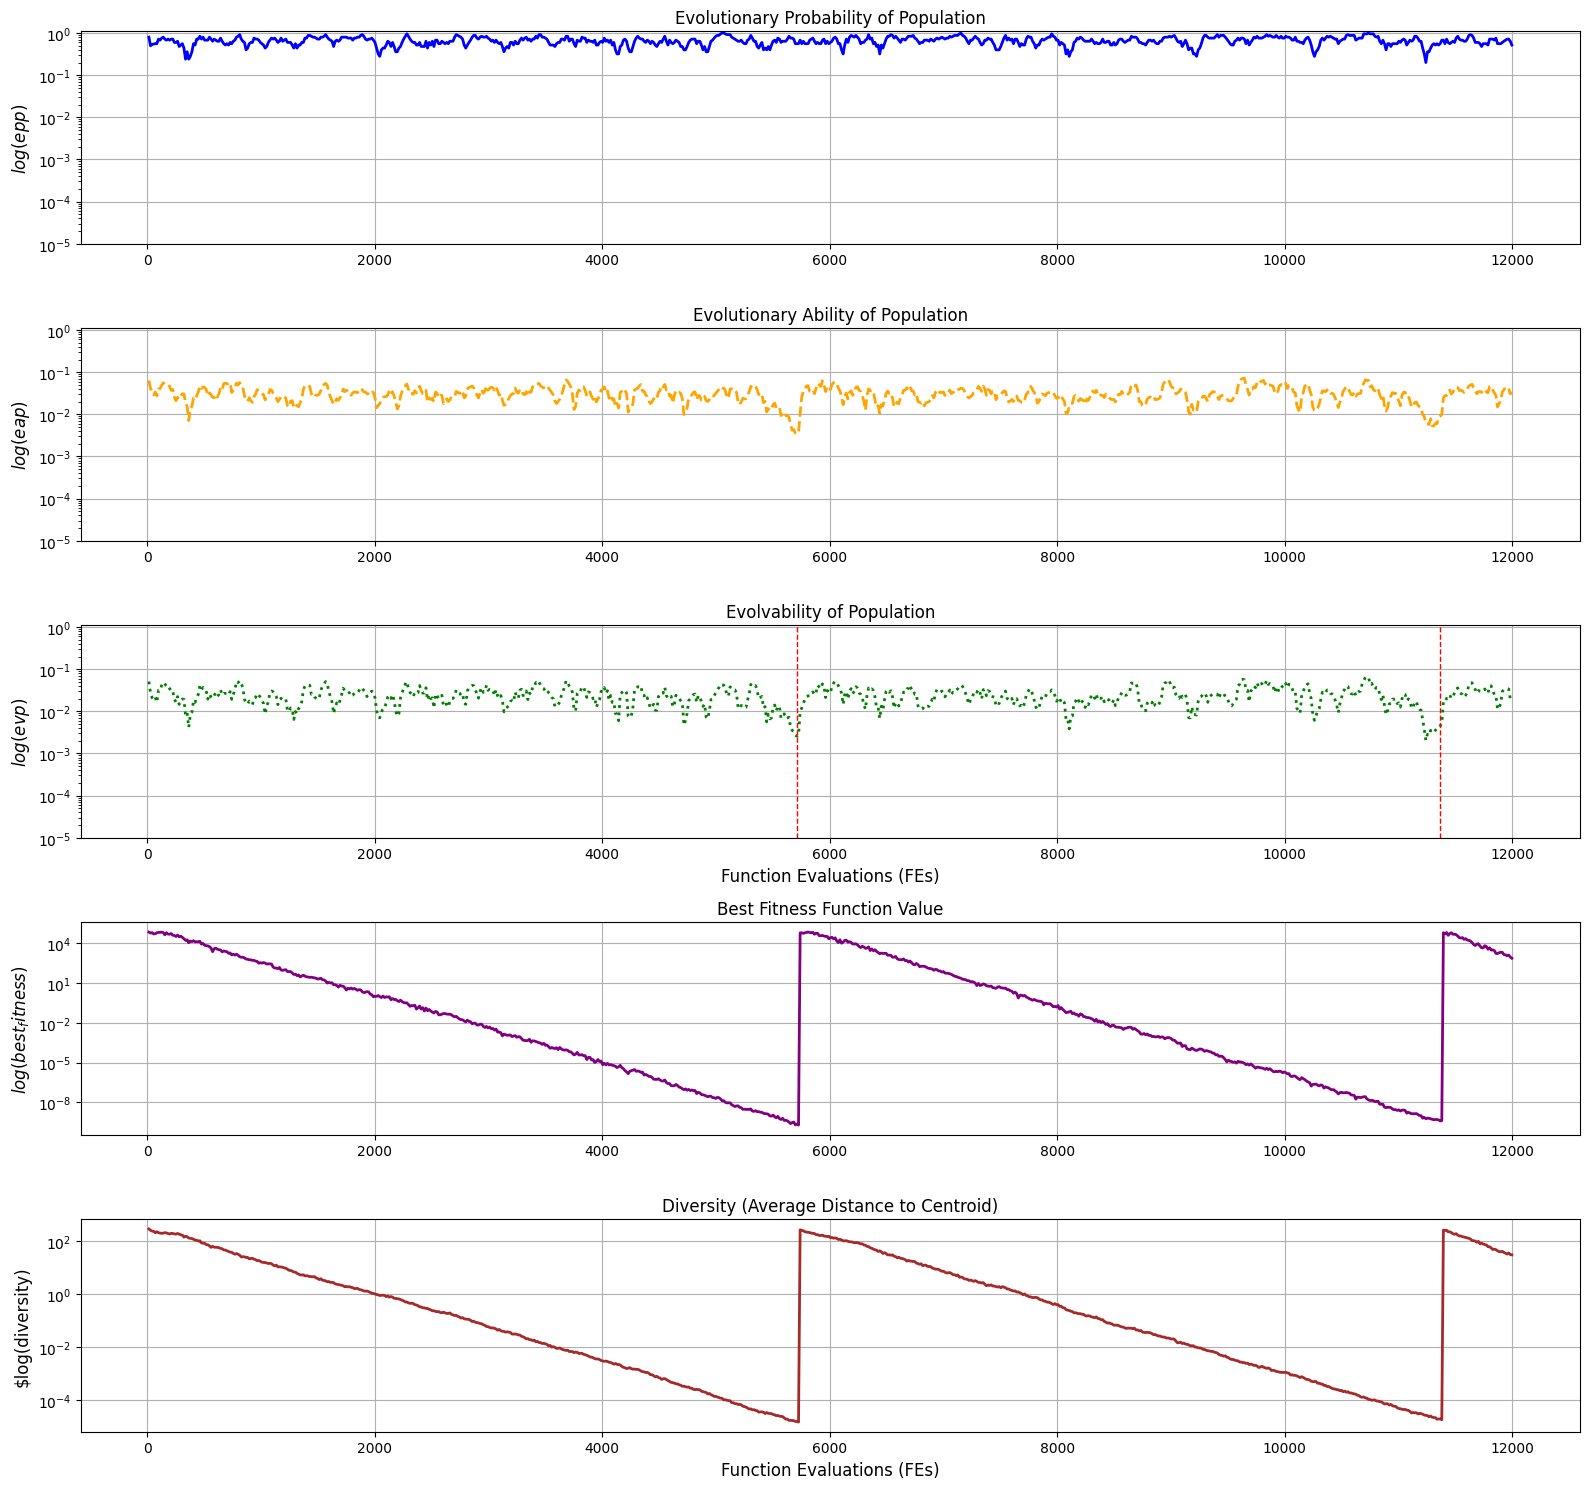

In [59]:
evp_strategy_for_f1.plot_metrics()

#### Score

In [60]:
strategy_score_for_f1 = evp_strategy_for_f1.score()

In [61]:
strategy_score_for_f1

best_fitness  mean_best_fitness  std_best_fitness  \
0  1.996304e-10       2.023805e-10      2.750160e-12   

   mean_functions_evaluations  std_functions_evaluations  
0                      5684.0                       28.0

## Schwefel’s function

In [63]:
f20 = bn.F20()

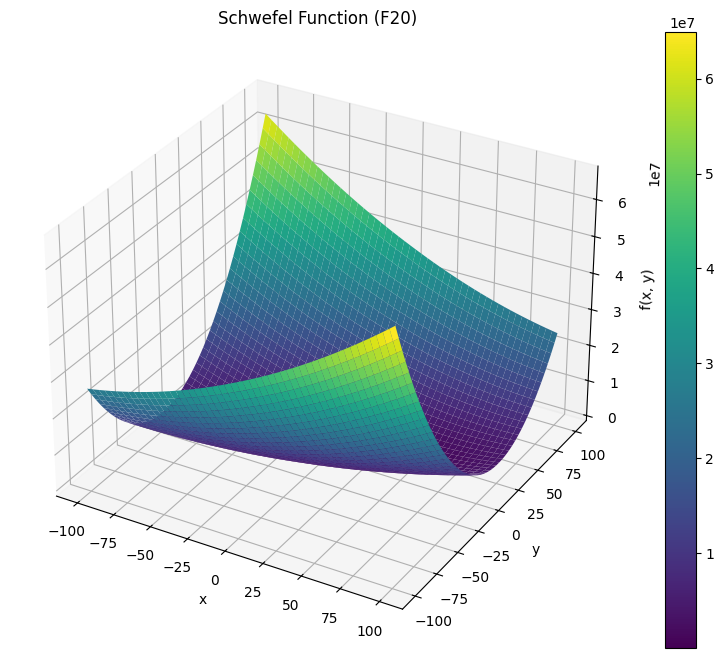

In [64]:
plot_function('Schwefel Function (F20)', f20, lb_, ub_)

### Evaluator

In [65]:
cmaes = CMAES(f20, dim_, sigma_, [lb_, ub_], pop_size_)
evp_evaluator_for_f20 = EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=125050, Thu Dec 12 22:03:34 2024)


100%|██████████| 857/857 [00:20<00:00, 41.77it/s]


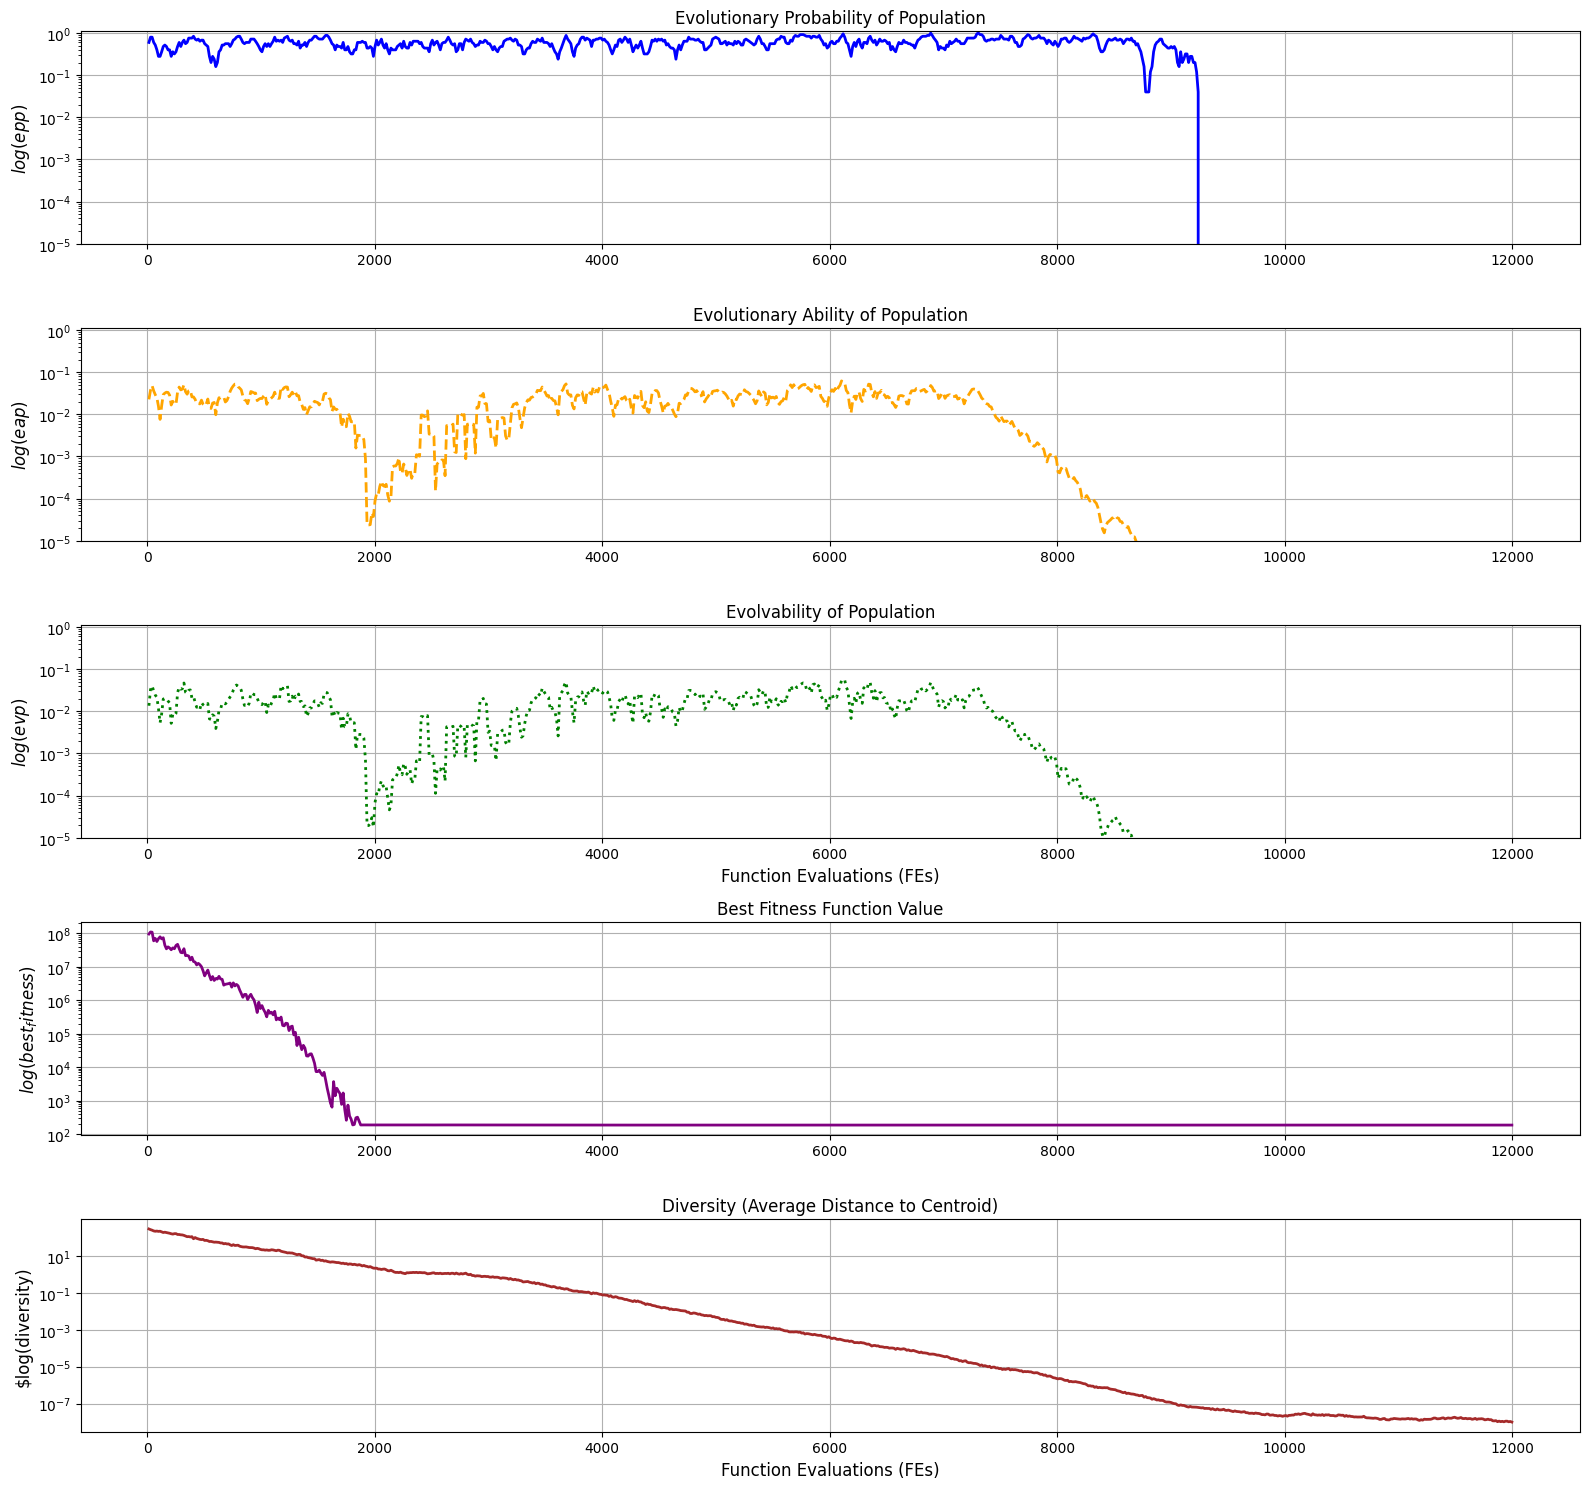

In [66]:
evp_evaluator_for_f20.evaluate(with_plot=True)

#### Score

In [67]:
def get_evaluator():
    cmaes = CMAES(f20, dim_, sigma_, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

In [68]:
evaluator_score_for_f20 = calculate_evaluator_score(get_evaluator)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=200933, Thu Dec 12 22:03:56 2024)


100%|██████████| 857/857 [00:21<00:00, 39.78it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=132701, Thu Dec 12 22:04:18 2024)


100%|██████████| 857/857 [00:21<00:00, 39.84it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=208077, Thu Dec 12 22:04:39 2024)


100%|██████████| 857/857 [00:21<00:00, 39.66it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=186899, Thu Dec 12 22:05:01 2024)


100%|██████████| 857/857 [00:21<00:00, 40.03it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=54704, Thu Dec 12 22:05:23 2024)


100%|██████████| 857/857 [00:21<00:00, 39.84it/s]


In [69]:
evaluator_score_for_f20

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0    184.626904         184.998167          0.277531                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [70]:
cmaes = CMAES(f20, dim_, sigma_, [lb_, ub_], pop_size_)
evp_strategy_for_f20 = EvolvabilityOfPopulationStrategy(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=172688, Thu Dec 12 22:05:44 2024)


In [71]:
evp_strategy_for_f20.evaluate()

 22%|██▏       | 186/857 [00:04<00:14, 45.00it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=156575, Thu Dec 12 22:05:49 2024)


 40%|███▉      | 341/857 [00:08<00:12, 41.56it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=142936, Thu Dec 12 22:05:53 2024)


 59%|█████▉    | 507/857 [00:12<00:07, 45.45it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=191351, Thu Dec 12 22:05:57 2024)


 77%|███████▋  | 662/857 [00:16<00:04, 45.64it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=81357, Thu Dec 12 22:06:01 2024)


 95%|█████████▌| 817/857 [00:20<00:00, 47.15it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=98350, Thu Dec 12 22:06:05 2024)


100%|██████████| 857/857 [00:21<00:00, 40.37it/s]


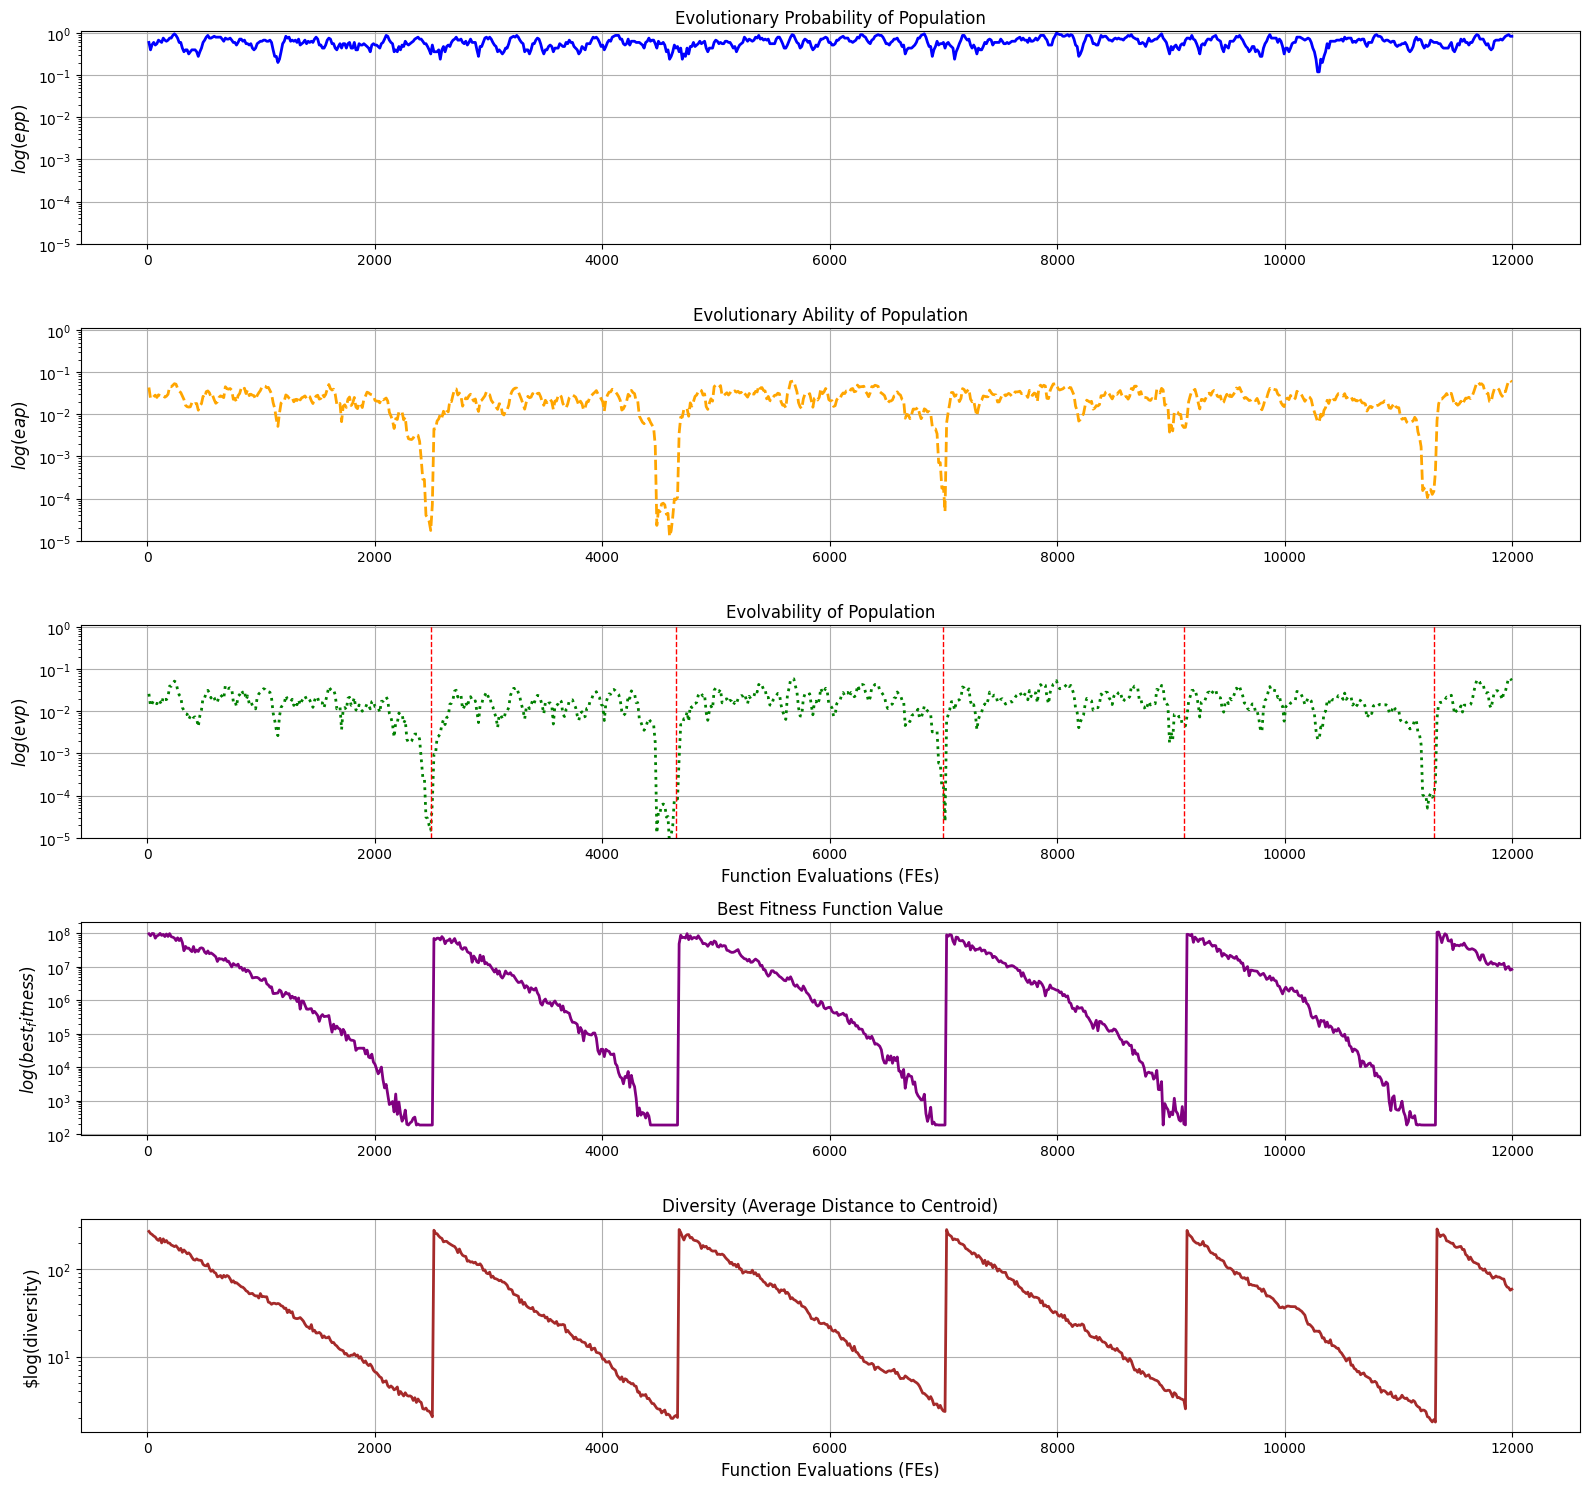

In [72]:
evp_strategy_for_f20.plot_metrics()

#### Score

In [73]:
strategy_score_for_f20 = evp_strategy_for_f20.score()

In [74]:
strategy_score_for_f20

best_fitness  mean_best_fitness  std_best_fitness  \
0    186.488781         186.771424          0.174649   

   mean_functions_evaluations  std_functions_evaluations  
0                      2262.4                 140.167899

## Radar function

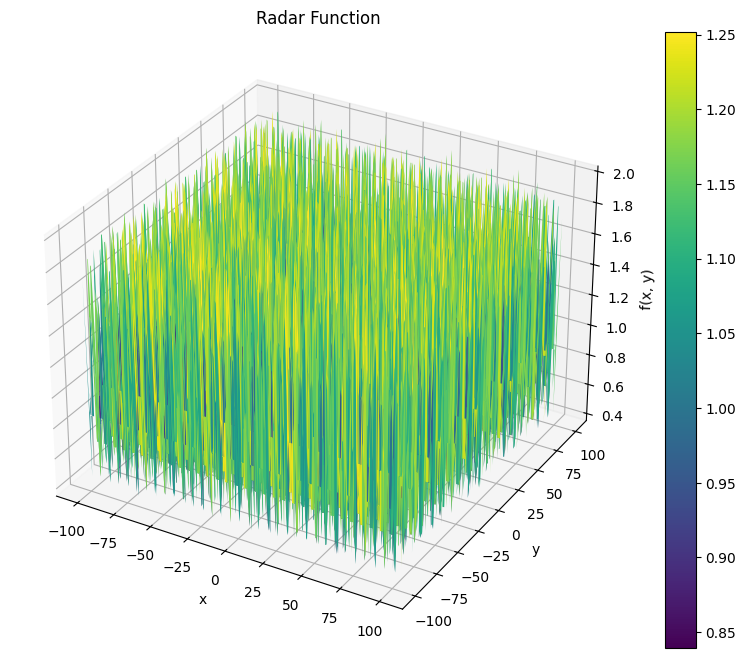

In [76]:
plot_function('Radar Function', radar_function, lb_, ub_)

### Evaluator

In [77]:
cmaes = CMAES(radar_function, dim_, sigma_, [lb_, ub_], pop_size_)
evp_evaluator_for_radar = EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=151199, Thu Dec 12 22:06:37 2024)


100%|██████████| 857/857 [04:26<00:00,  3.21it/s]


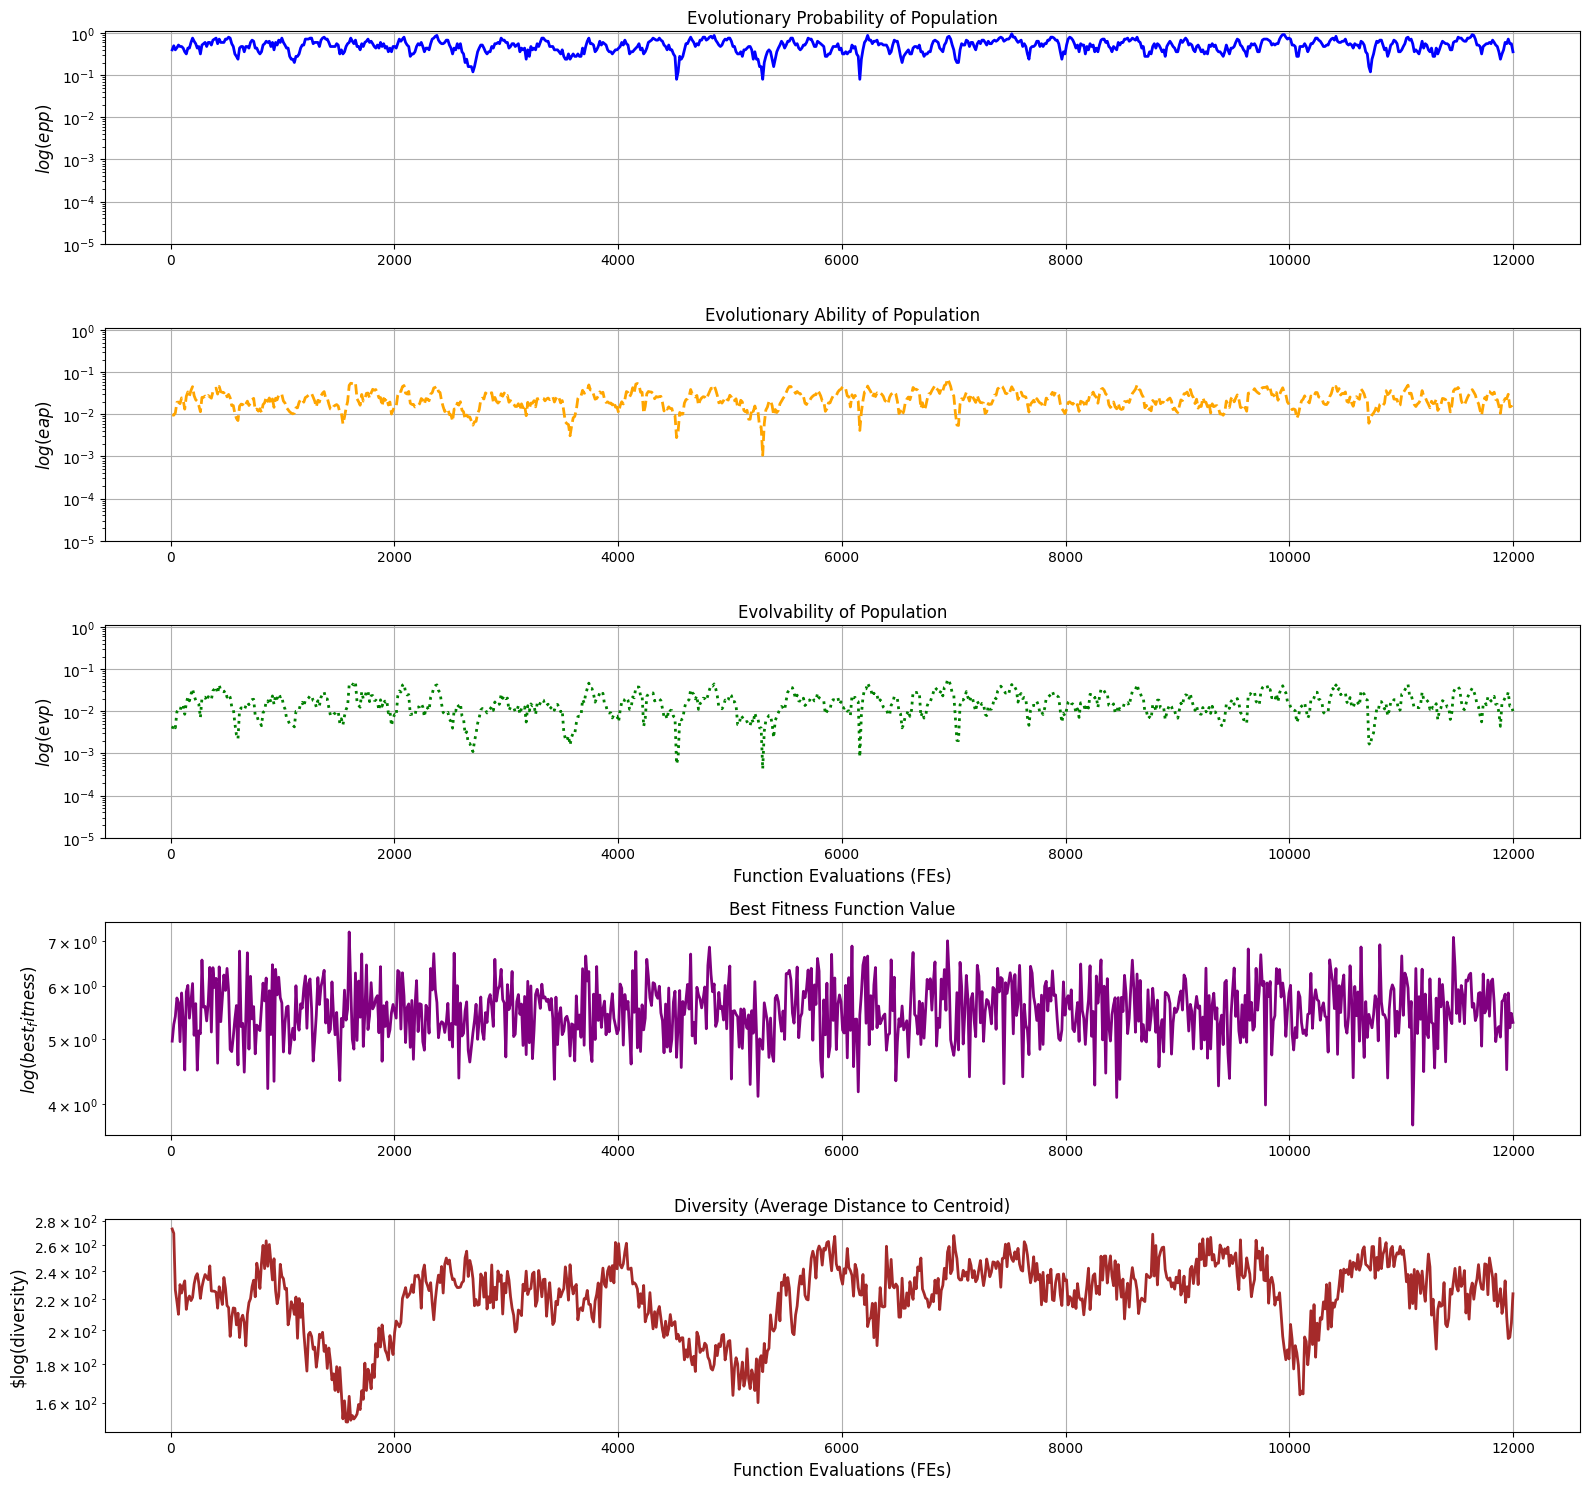

In [78]:
evp_evaluator_for_radar.evaluate(with_plot=True)

#### Score

In [79]:
def get_evaluator():
    cmaes = CMAES(radar_function, dim_, sigma_, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

In [80]:
evaluator_score_for_radar = calculate_evaluator_score(get_evaluator)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=64362, Thu Dec 12 22:11:07 2024)


100%|██████████| 857/857 [04:21<00:00,  3.28it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=151278, Thu Dec 12 22:15:28 2024)


100%|██████████| 857/857 [04:16<00:00,  3.35it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=155925, Thu Dec 12 22:19:44 2024)


100%|██████████| 857/857 [04:21<00:00,  3.27it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=127553, Thu Dec 12 22:24:06 2024)


100%|██████████| 857/857 [04:17<00:00,  3.33it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=140839, Thu Dec 12 22:28:23 2024)


100%|██████████| 857/857 [04:20<00:00,  3.29it/s]


In [81]:
evaluator_score_for_radar

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0      3.606597           3.830419          0.146727                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [82]:
cmaes = CMAES(radar_function, dim_, sigma_, [lb_, ub_], pop_size_)
evp_strategy_for_radar = EvolvabilityOfPopulationStrategy(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=159061, Thu Dec 12 22:32:44 2024)


In [83]:
evp_strategy_for_radar.evaluate()

100%|██████████| 857/857 [04:20<00:00,  3.29it/s]


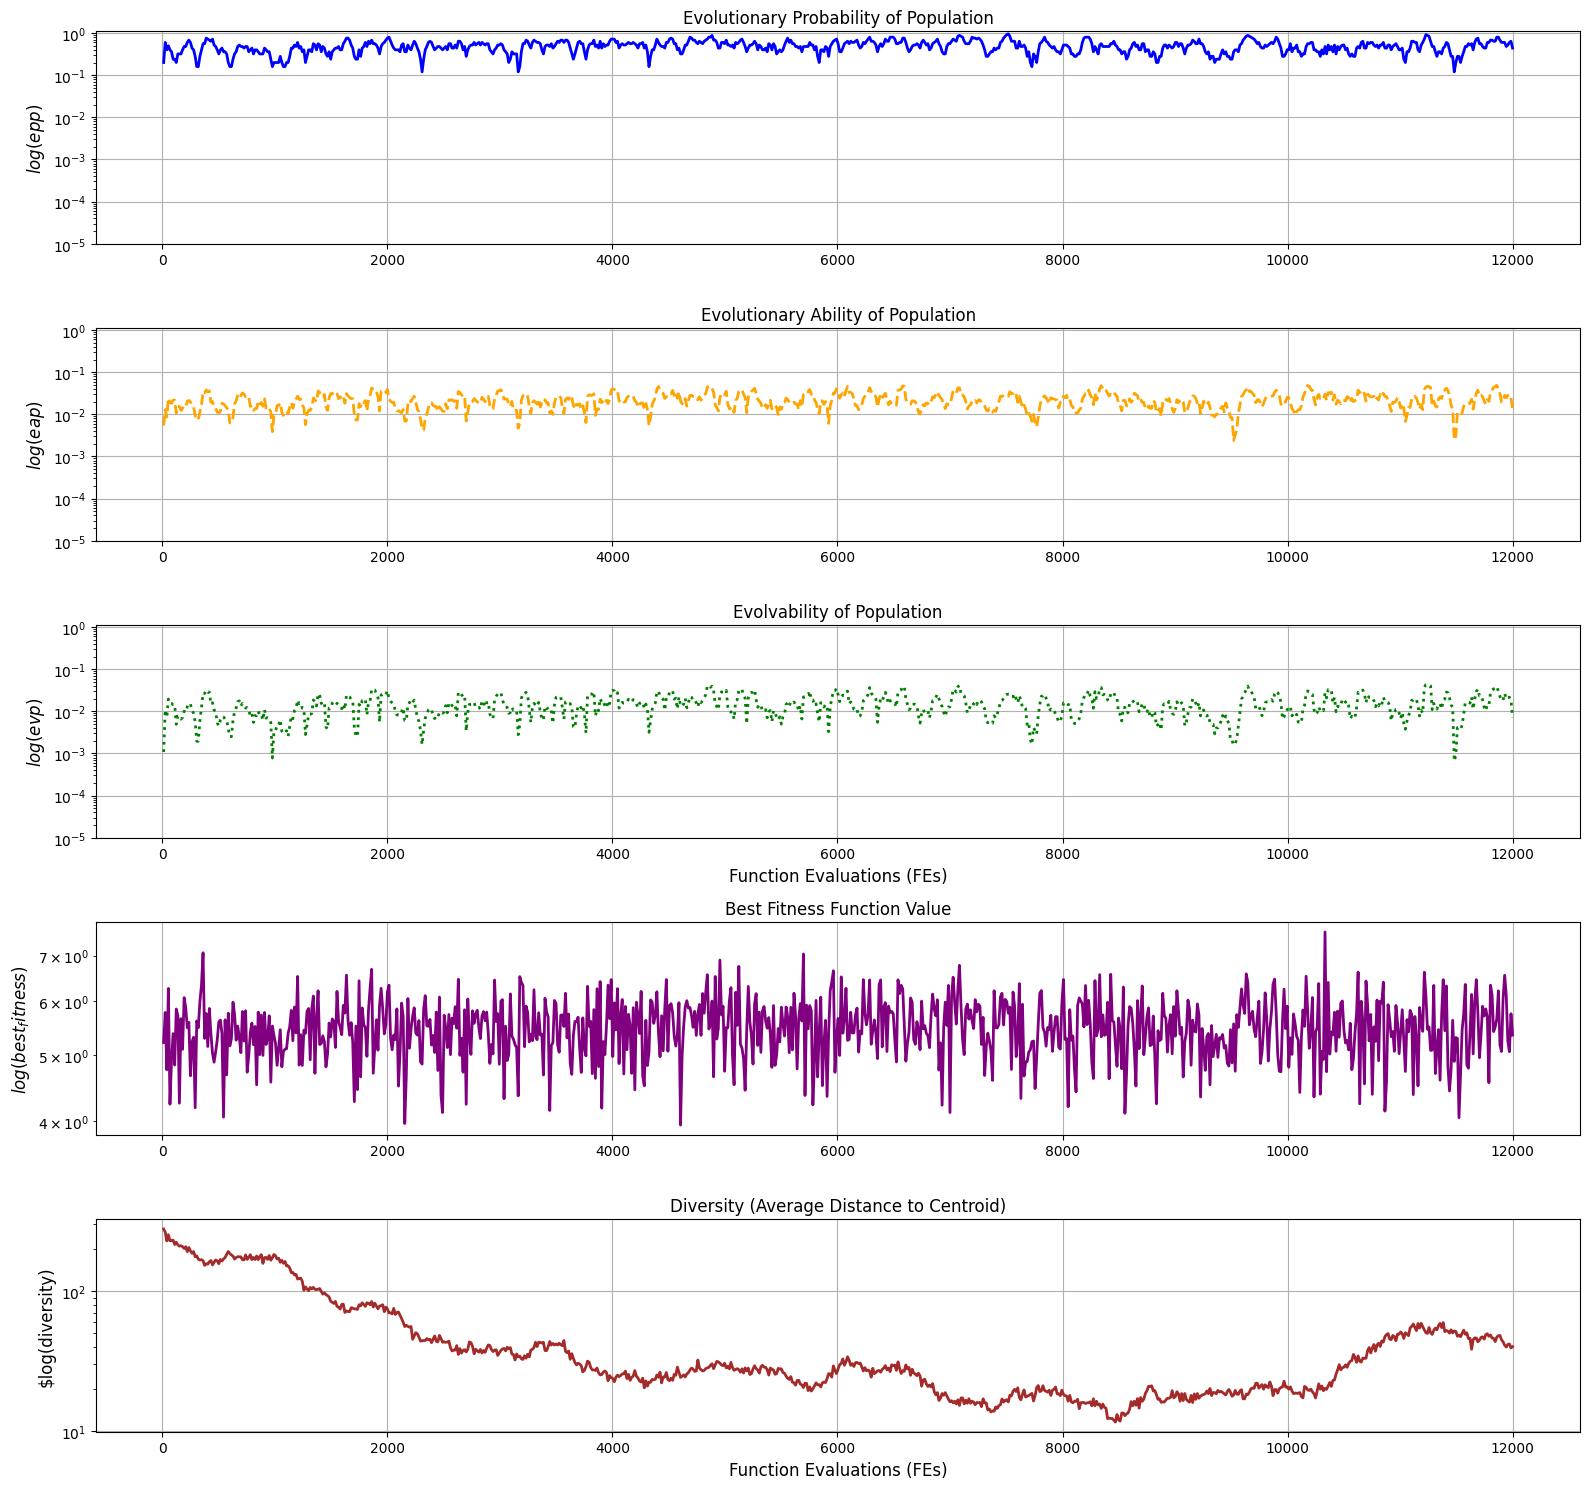

In [84]:
evp_strategy_for_radar.plot_metrics()

#### Score

In [85]:
strategy_score_for_radar = evp_strategy_for_radar.score()

In [86]:
strategy_score_for_radar

best_fitness  mean_best_fitness  std_best_fitness  \
0      3.945213           3.945213                 0   

   mean_functions_evaluations  std_functions_evaluations  
0                       12000                          0

## Rastrigin function

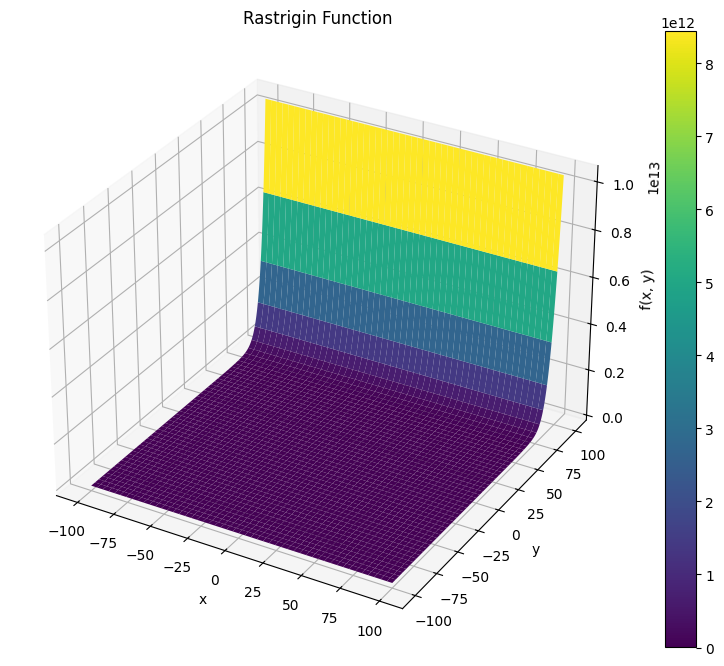

In [4]:
plot_function('Rastrigin Function', get_problem(3, 2, 2, ProblemClass.BBOB), lb_, ub_)

In [5]:
def f3(x):
    problem = get_problem(3, 1, 30, ProblemClass.BBOB)
    return problem(x)

### Evaluator

In [6]:
cmaes = CMAES(f3, dim_, sigma_, [lb_, ub_], pop_size_)
evp_evaluator_for_f3 = EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=110964, Thu Dec 12 21:28:04 2024)


100%|██████████| 857/857 [01:03<00:00, 13.51it/s]


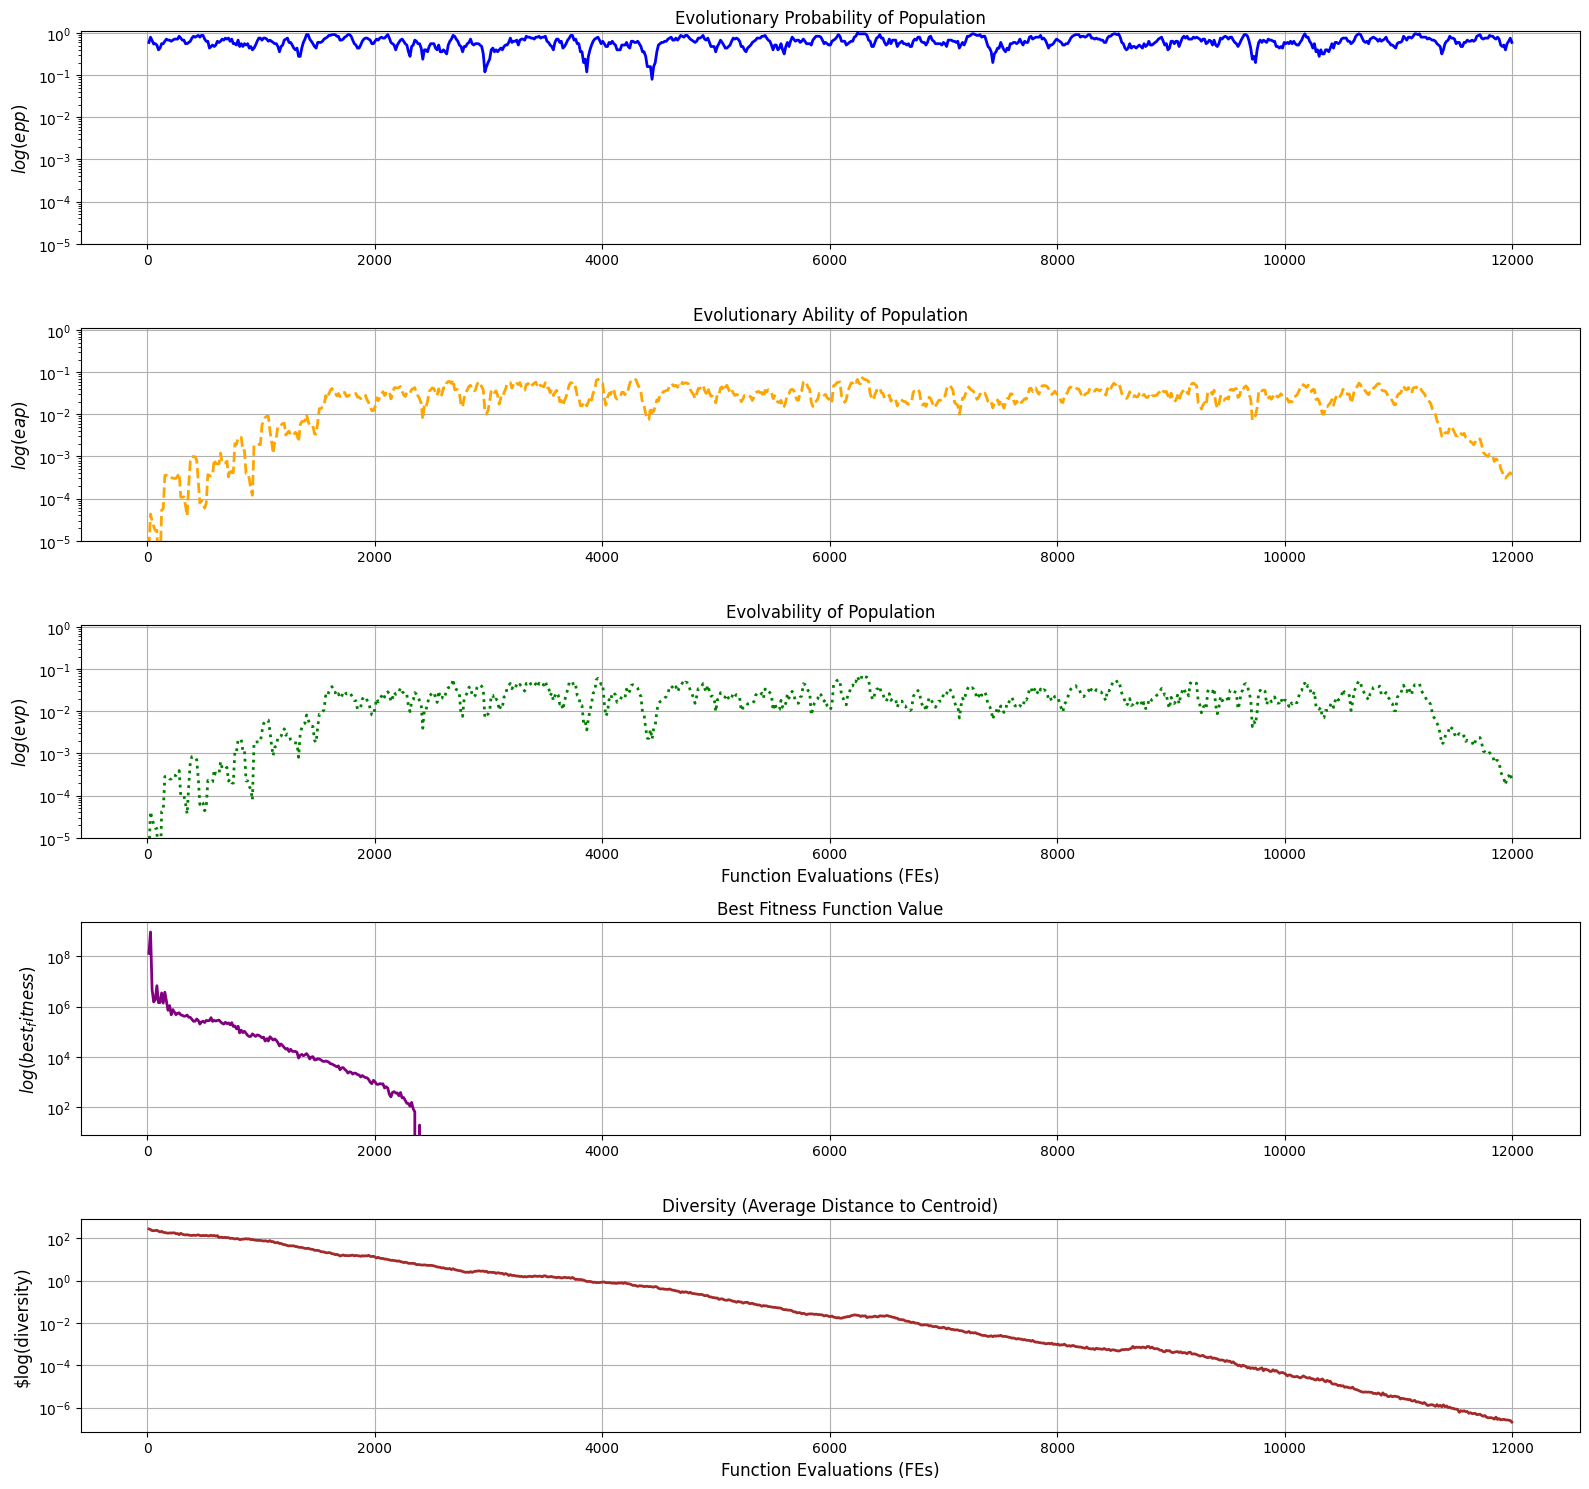

In [7]:
evp_evaluator_for_f3.evaluate(with_plot=True)

#### Score

In [9]:
def get_evaluator():
    cmaes = CMAES(f3, dim_, sigma_, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

In [10]:
evaluator_score_for_f3 = calculate_evaluator_score(get_evaluator)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=124102, Thu Dec 12 21:30:33 2024)


100%|██████████| 857/857 [01:03<00:00, 13.46it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=59953, Thu Dec 12 21:31:37 2024)


100%|██████████| 857/857 [01:06<00:00, 12.88it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=108103, Thu Dec 12 21:32:43 2024)


100%|██████████| 857/857 [01:05<00:00, 13.12it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=162017, Thu Dec 12 21:33:48 2024)


100%|██████████| 857/857 [01:27<00:00,  9.74it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=182233, Thu Dec 12 21:35:16 2024)


100%|██████████| 857/857 [01:40<00:00,  8.53it/s]


In [11]:
evaluator_score_for_f3

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0   -409.357241        -394.432973         15.010259                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [12]:
cmaes = CMAES(f3, dim_, sigma_, [lb_, ub_], pop_size_)
evp_strategy_for_f3 = EvolvabilityOfPopulationStrategy(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=121446, Thu Dec 12 21:37:04 2024)


In [13]:
evp_strategy_for_f3.evaluate()

 12%|█▏        | 103/857 [00:12<01:13, 10.25it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=149864, Thu Dec 12 21:37:19 2024)


 27%|██▋       | 228/857 [00:28<01:03,  9.92it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=214003, Thu Dec 12 21:37:34 2024)


 38%|███▊      | 327/857 [00:40<01:12,  7.34it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=168135, Thu Dec 12 21:37:46 2024)


 50%|████▉     | 428/857 [00:51<00:31, 13.46it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=106130, Thu Dec 12 21:37:58 2024)


 63%|██████▎   | 536/857 [01:00<00:28, 11.40it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=70987, Thu Dec 12 21:38:07 2024)


 74%|███████▍  | 636/857 [01:08<00:17, 12.91it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=148678, Thu Dec 12 21:38:14 2024)


 87%|████████▋ | 748/857 [01:16<00:08, 13.03it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=129310, Thu Dec 12 21:38:23 2024)


 99%|█████████▉| 848/857 [01:24<00:00, 13.01it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=140116, Thu Dec 12 21:38:31 2024)


100%|██████████| 857/857 [01:25<00:00, 10.04it/s]


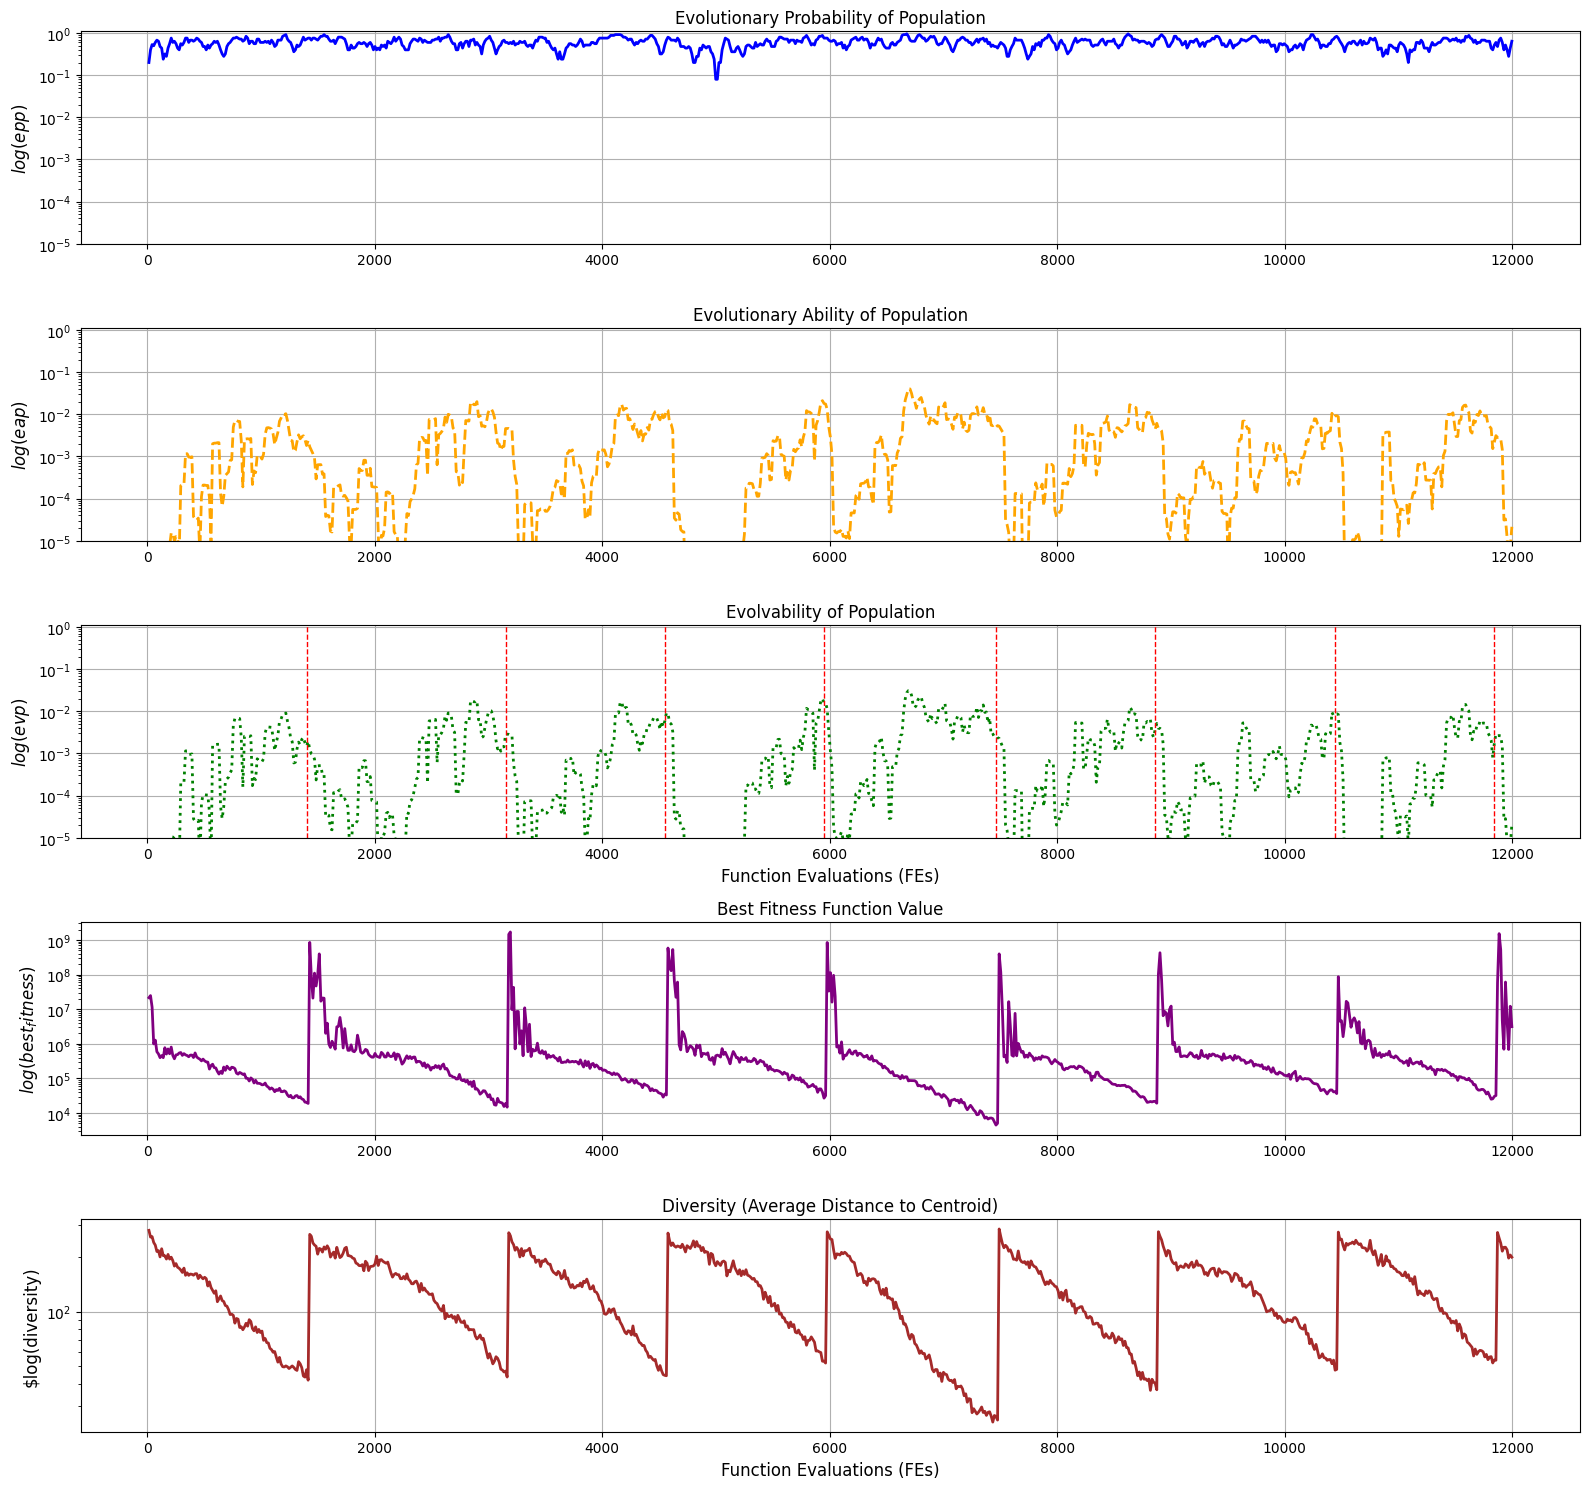

In [15]:
evp_strategy_for_f3.plot_metrics()

#### Score

In [16]:
strategy_score_for_f3 = evp_strategy_for_f3.score()

In [17]:
strategy_score_for_f3

best_fitness  mean_best_fitness  std_best_fitness  \
0   4490.351769       16409.945366       7771.158251   

   mean_functions_evaluations  std_functions_evaluations  
0                      1480.5                 120.585032

## Step Ellipsoidal Function

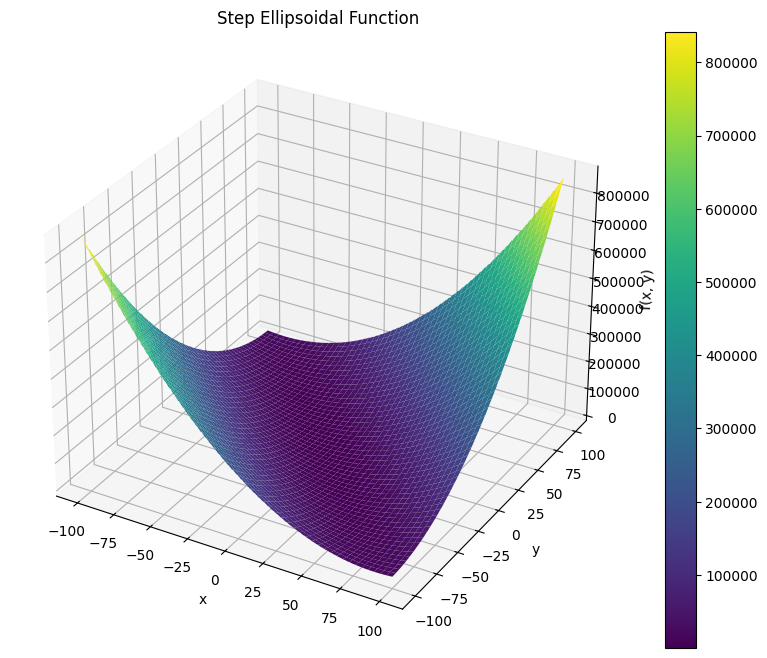

In [18]:
plot_function('Step Ellipsoidal Function', get_problem(7, 1, 2, ProblemClass.BBOB), lb_, ub_)

In [19]:
def f7(x):
    problem = get_problem(7, 1, 30, ProblemClass.BBOB)
    return problem(x)

### Evaluator

In [20]:
cmaes = CMAES(f7, dim_, sigma_, [lb_, ub_], pop_size_)
evp_evaluator_for_f7 = EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=215453, Thu Dec 12 21:42:38 2024)


100%|██████████| 857/857 [01:05<00:00, 13.10it/s]


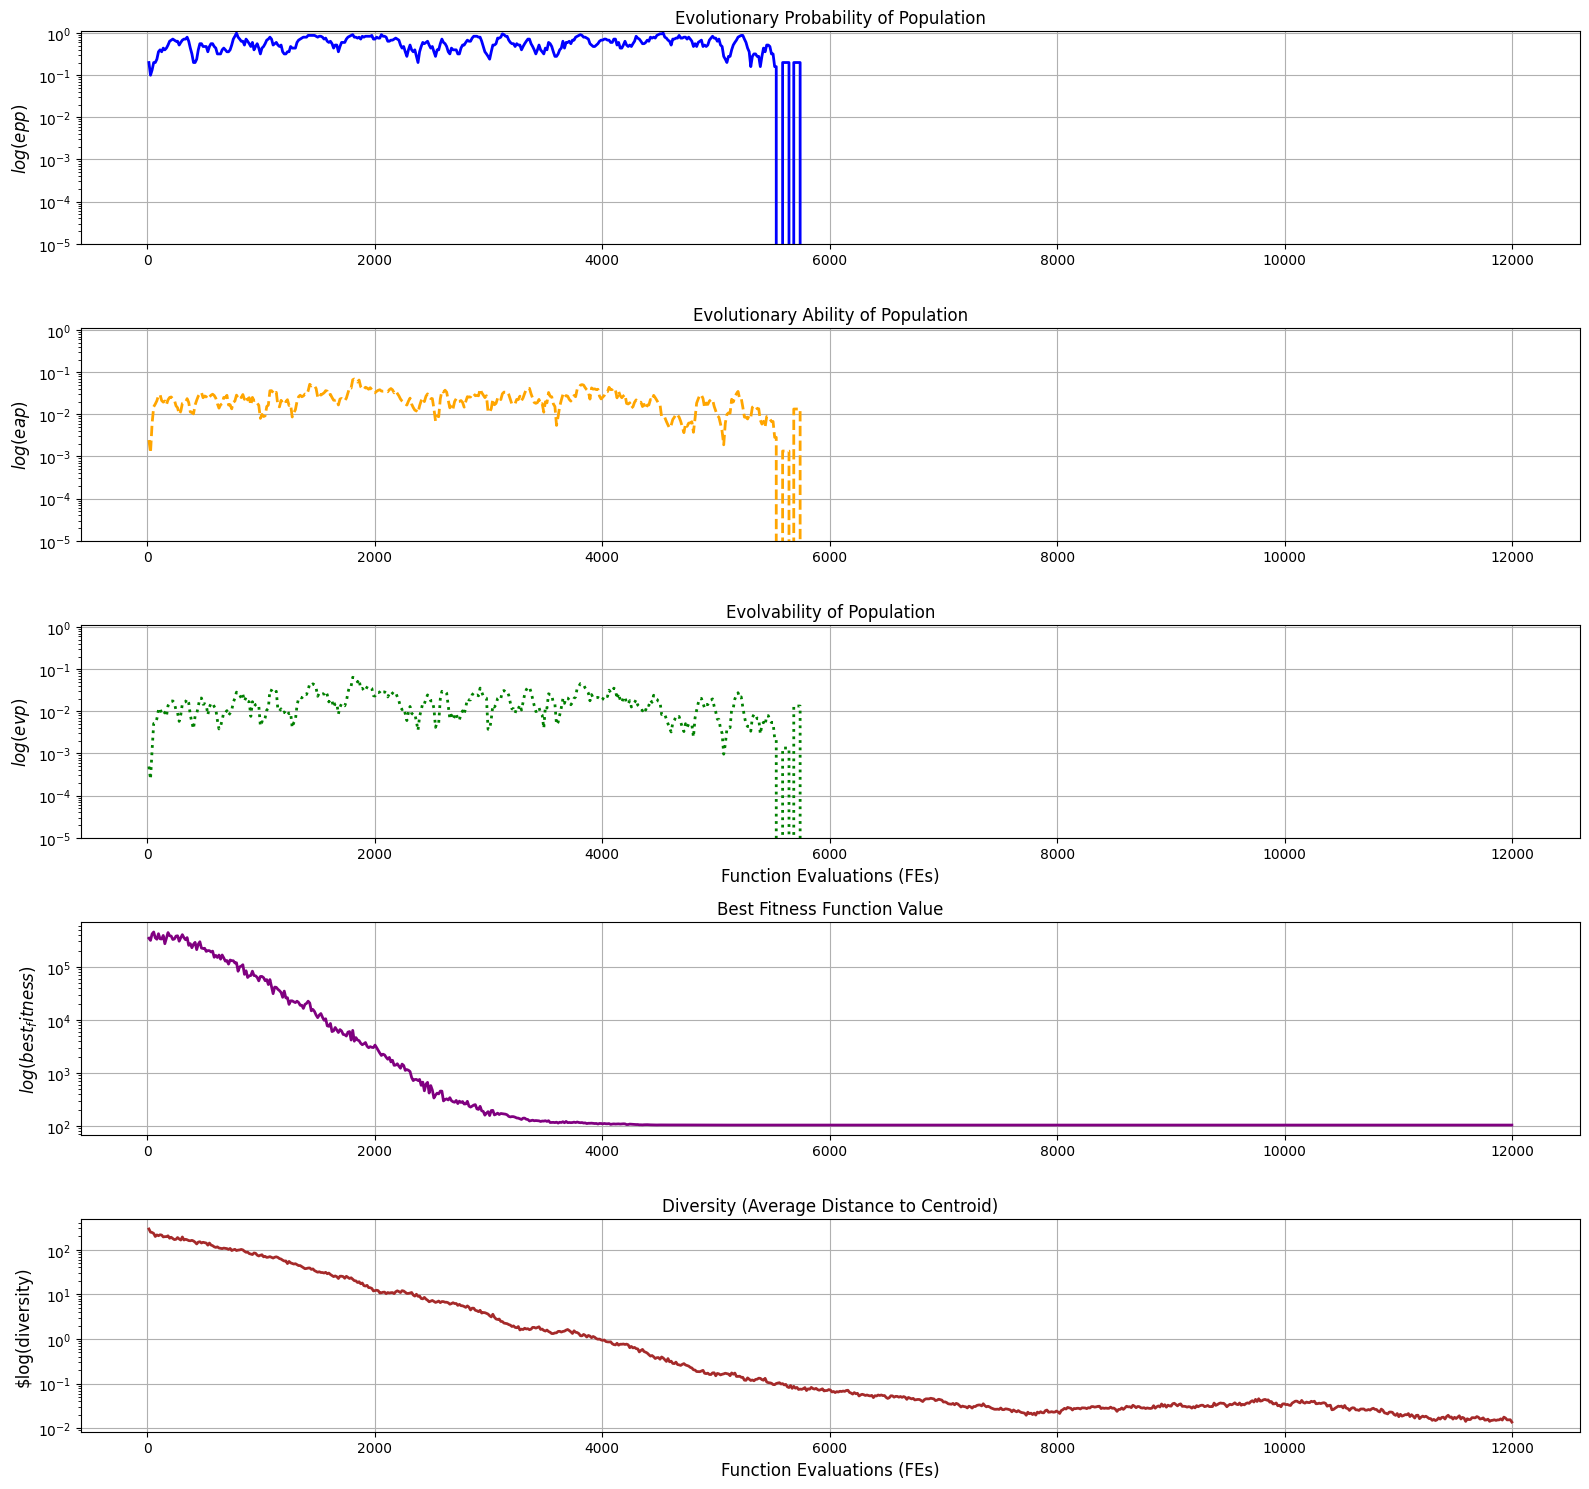

In [21]:
evp_evaluator_for_f7.evaluate(with_plot=True)

#### Score

In [23]:
def get_evaluator():
    cmaes = CMAES(f7, dim_, sigma_, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

In [24]:
evaluator_score_for_f7 = calculate_evaluator_score(get_evaluator)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=92686, Thu Dec 12 21:45:15 2024)


100%|██████████| 857/857 [01:06<00:00, 12.98it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=99978, Thu Dec 12 21:46:21 2024)


100%|██████████| 857/857 [01:05<00:00, 13.10it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=121853, Thu Dec 12 21:47:26 2024)


100%|██████████| 857/857 [01:06<00:00, 12.97it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=177273, Thu Dec 12 21:48:32 2024)


100%|██████████| 857/857 [01:06<00:00, 12.90it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=162570, Thu Dec 12 21:49:39 2024)


100%|██████████| 857/857 [01:04<00:00, 13.37it/s]


In [25]:
evaluator_score_for_f7

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0    100.715464         103.956974          2.630182                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [26]:
cmaes = CMAES(f7, dim_, sigma_, [lb_, ub_], pop_size_)
evp_strategy_for_f7 = EvolvabilityOfPopulationStrategy(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=172033, Thu Dec 12 21:50:43 2024)


In [27]:
evp_strategy_for_f7.evaluate()

 38%|███▊      | 324/857 [00:24<00:38, 13.94it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=130900, Thu Dec 12 21:51:08 2024)


 77%|███████▋  | 658/857 [00:49<00:14, 13.91it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=123732, Thu Dec 12 21:51:33 2024)


100%|██████████| 857/857 [01:05<00:00, 13.17it/s]


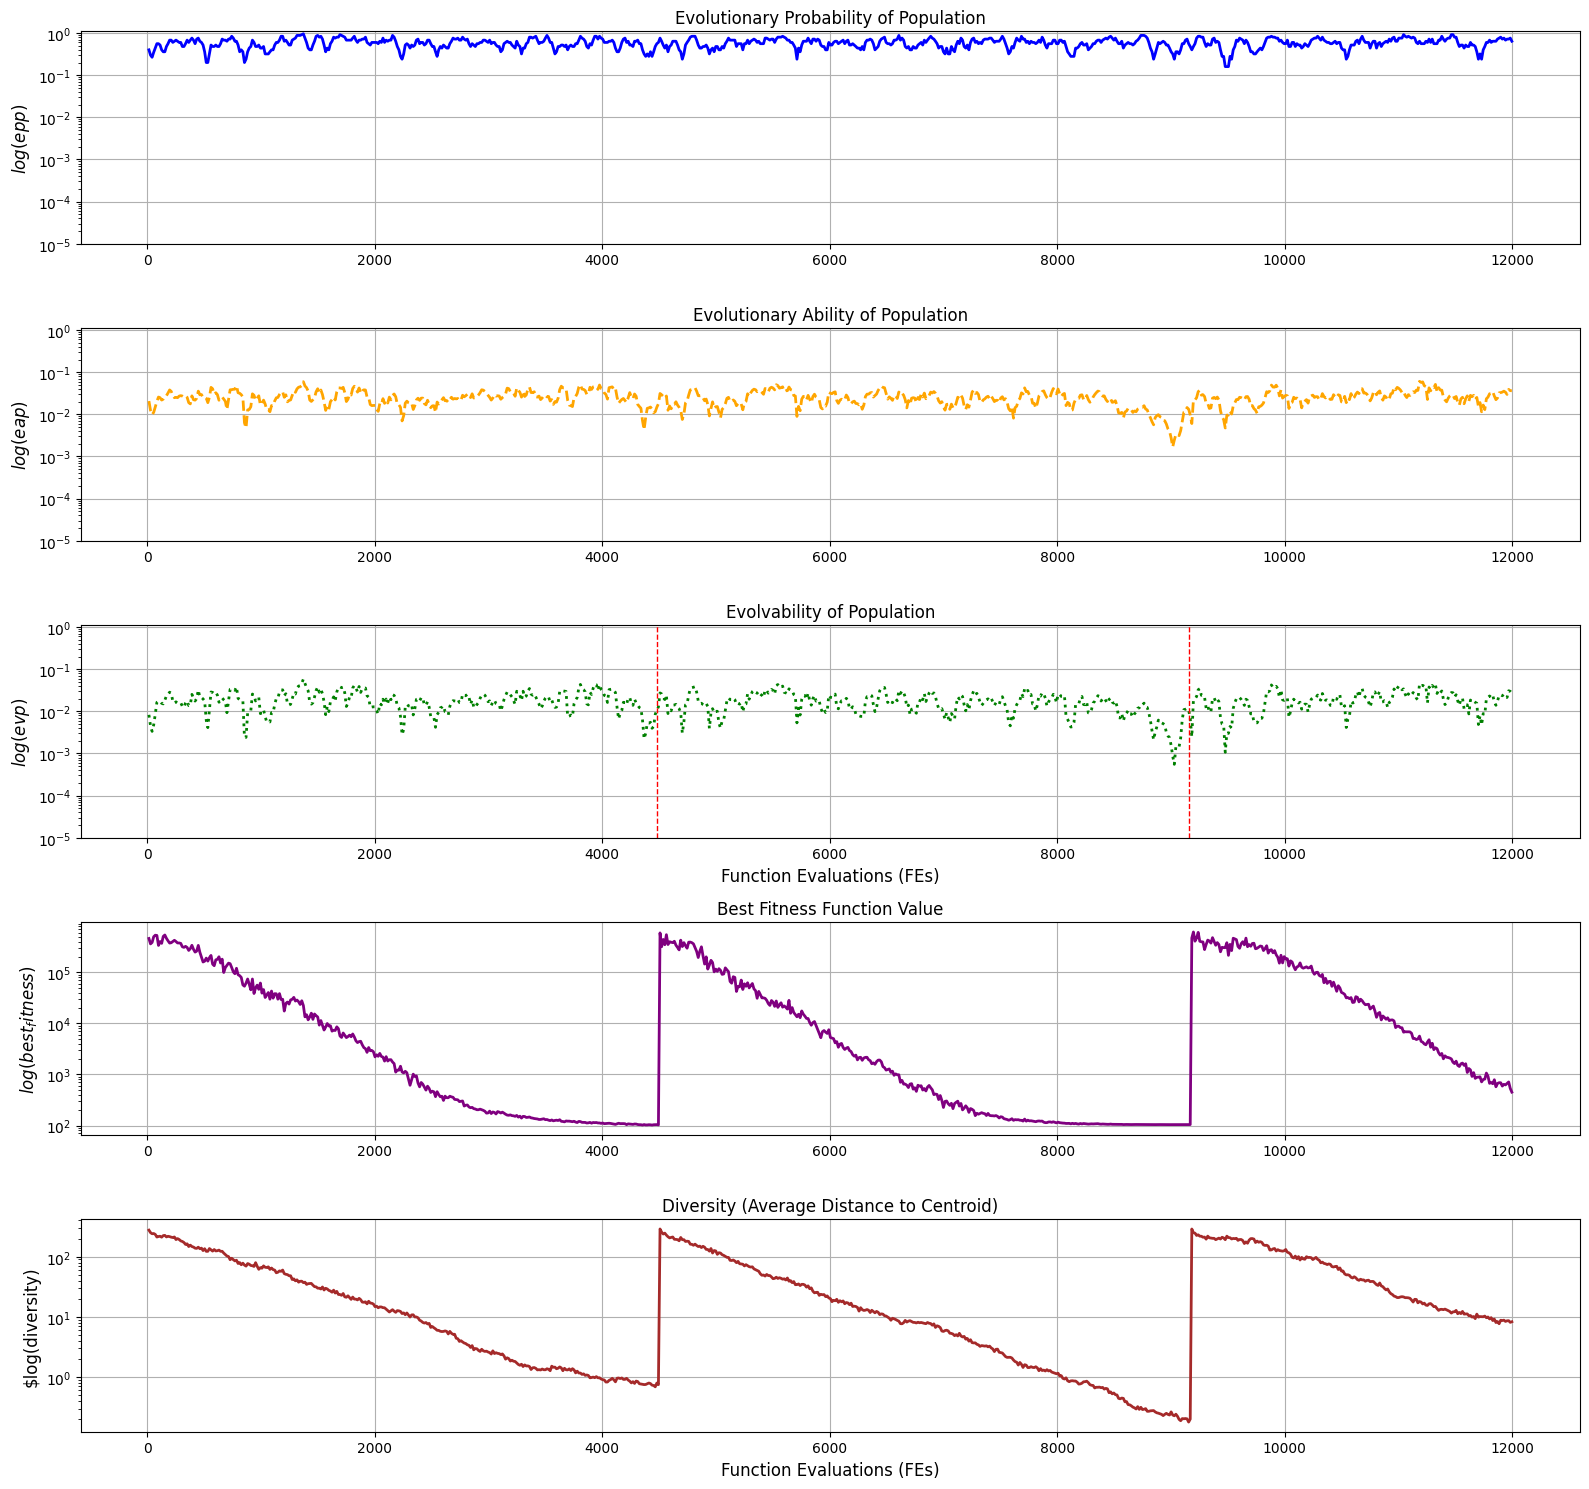

In [28]:
evp_strategy_for_f7.plot_metrics()

#### Score

In [29]:
strategy_score_for_f7 = evp_strategy_for_f7.score()

In [30]:
strategy_score_for_f7

best_fitness  mean_best_fitness  std_best_fitness  \
0    101.977631         102.344433          0.366802   

   mean_functions_evaluations  std_functions_evaluations  
0                      4578.0                       98.0

## Bent Cigar Function

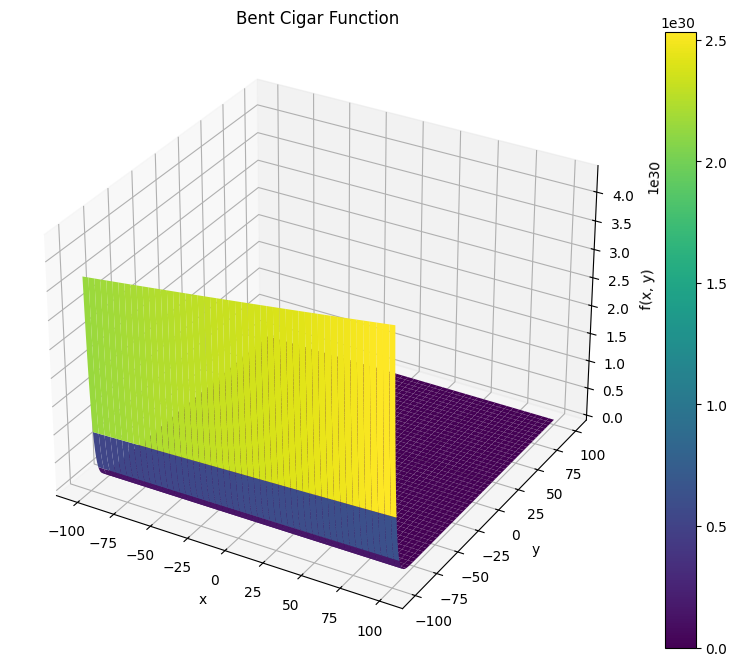

In [31]:
plot_function('Bent Cigar Function', get_problem(12, 1, 2, ProblemClass.BBOB), lb_, ub_)

In [32]:
def f12(x):
    problem = get_problem(12, 1, 30, ProblemClass.BBOB)
    return problem(x)

### Evaluator

In [44]:
cmaes = CMAES(f12, dim_, sigma_, [lb_, ub_], pop_size_)
evp_evaluator_for_f12 = EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=152799, Thu Dec 12 21:59:29 2024)


100%|██████████| 857/857 [01:03<00:00, 13.58it/s]


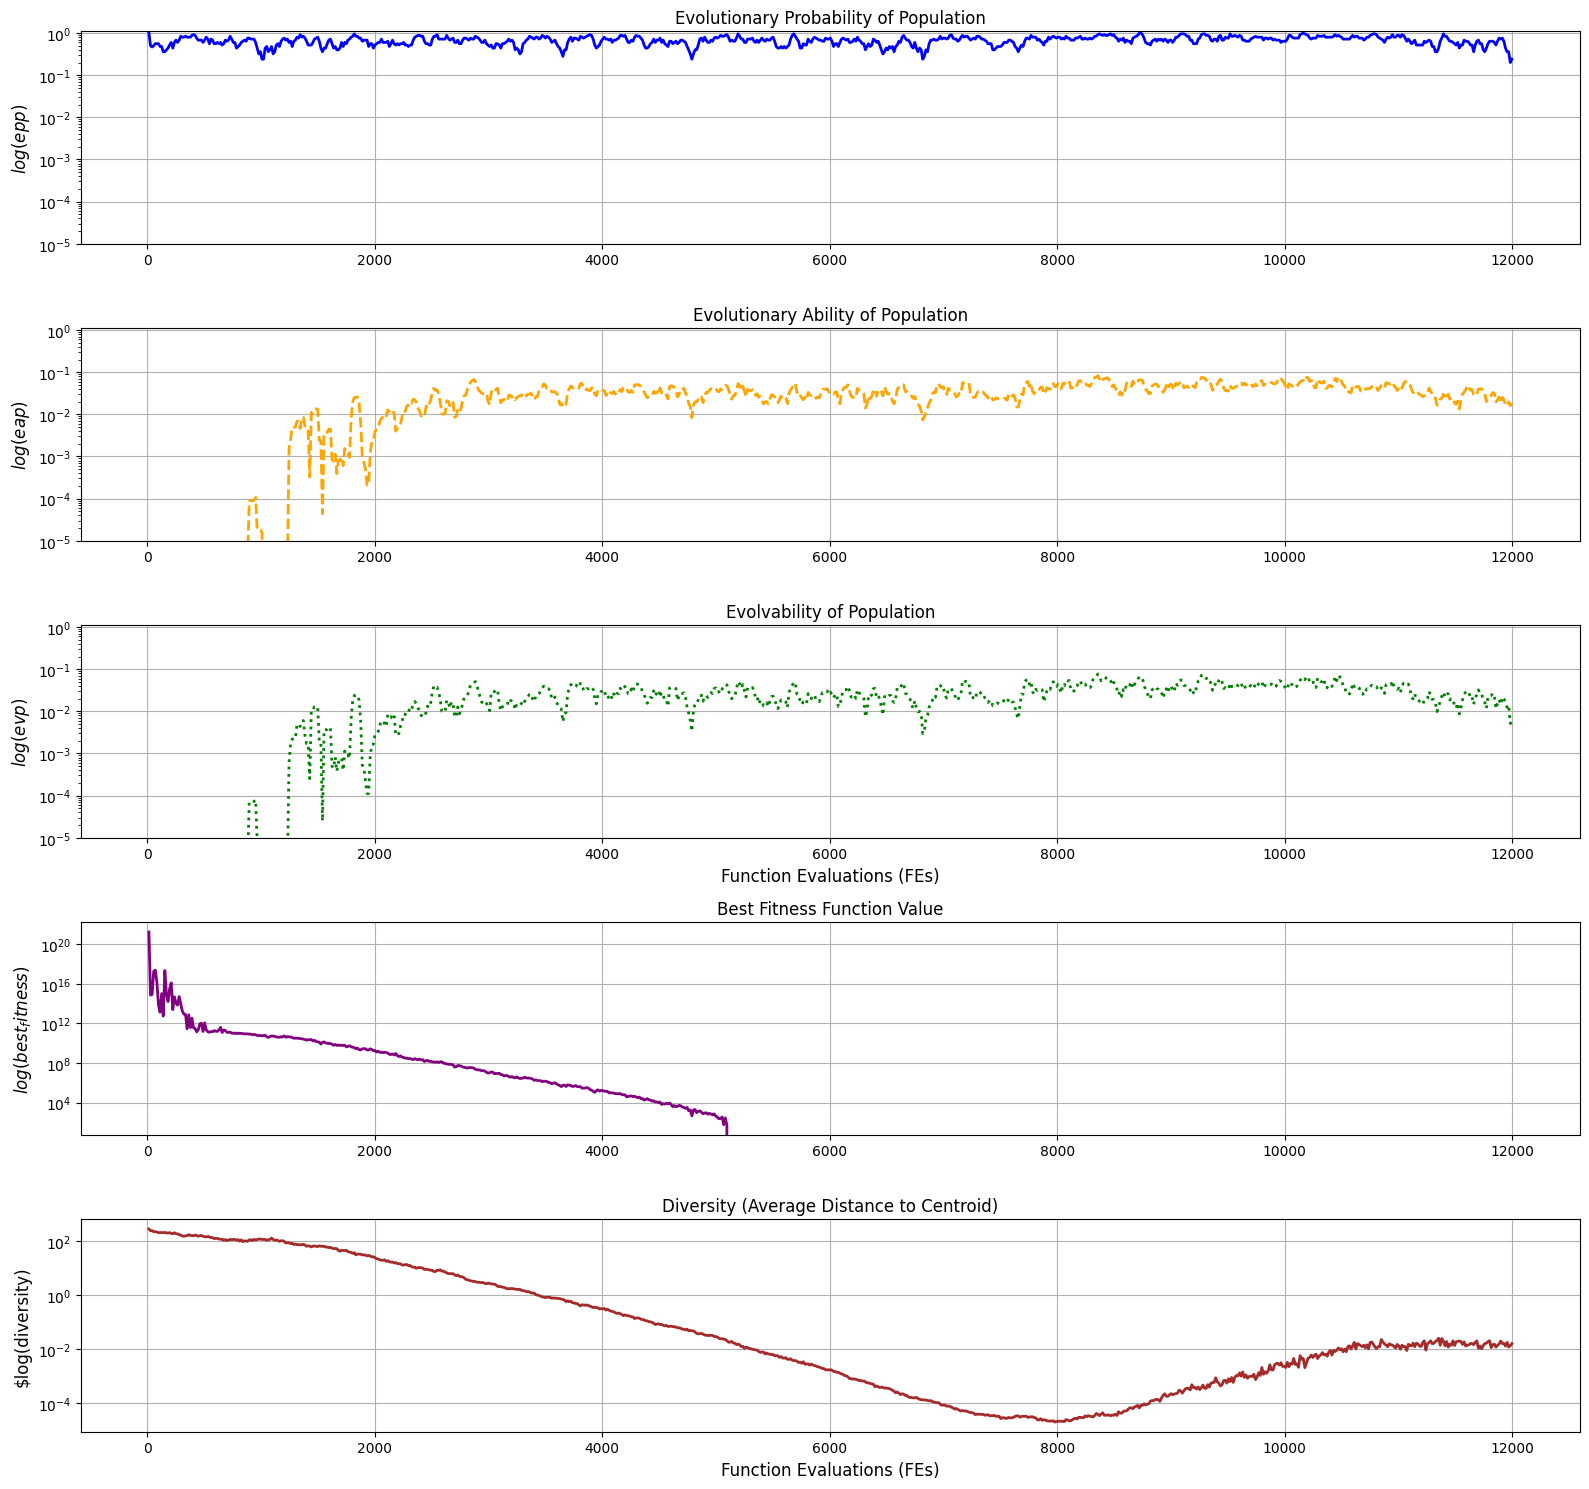

In [45]:
evp_evaluator_for_f12.evaluate(with_plot=True)

#### Score

In [34]:
def get_evaluator():
    cmaes = CMAES(f12, dim_, sigma_, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(cmaes, maxFEs_, nNeighbours_)

In [35]:
evaluator_score_for_f12 = calculate_evaluator_score(get_evaluator)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=162367, Thu Dec 12 21:51:51 2024)


100%|██████████| 857/857 [01:05<00:00, 13.04it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=152370, Thu Dec 12 21:52:57 2024)


100%|██████████| 857/857 [01:06<00:00, 12.88it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=65736, Thu Dec 12 21:54:04 2024)


100%|██████████| 857/857 [01:06<00:00, 12.95it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=149901, Thu Dec 12 21:55:10 2024)


100%|██████████| 857/857 [01:04<00:00, 13.26it/s]


(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=223810, Thu Dec 12 21:56:14 2024)


100%|██████████| 857/857 [01:04<00:00, 13.22it/s]


In [36]:
evaluator_score_for_f12

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0   -620.990159        -480.538367        273.701402                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [37]:
cmaes = CMAES(f12, dim_, sigma_, [lb_, ub_], pop_size_)
evp_strategy_for_f12 = EvolvabilityOfPopulationStrategy(cmaes, maxFEs_, nNeighbours_)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=75276, Thu Dec 12 21:57:20 2024)


In [38]:
evp_strategy_for_f12.evaluate()

 12%|█▏        | 104/857 [00:07<00:54, 13.74it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=114537, Thu Dec 12 21:57:28 2024)


 24%|██▍       | 204/857 [00:15<00:46, 13.93it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=126514, Thu Dec 12 21:57:35 2024)


 35%|███▌      | 304/857 [00:22<00:38, 14.42it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=66177, Thu Dec 12 21:57:43 2024)


 47%|████▋     | 404/857 [00:30<00:31, 14.36it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=162091, Thu Dec 12 21:57:50 2024)


 59%|█████▉    | 504/857 [00:37<00:28, 12.18it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=210975, Thu Dec 12 21:57:57 2024)


 71%|███████   | 606/857 [00:45<00:17, 14.16it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=85639, Thu Dec 12 21:58:05 2024)


 82%|████████▏ | 706/857 [00:52<00:10, 14.14it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=182322, Thu Dec 12 21:58:12 2024)


 94%|█████████▍| 806/857 [00:59<00:03, 13.83it/s]

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 30 (seed=227887, Thu Dec 12 21:58:19 2024)


100%|██████████| 857/857 [01:03<00:00, 13.49it/s]


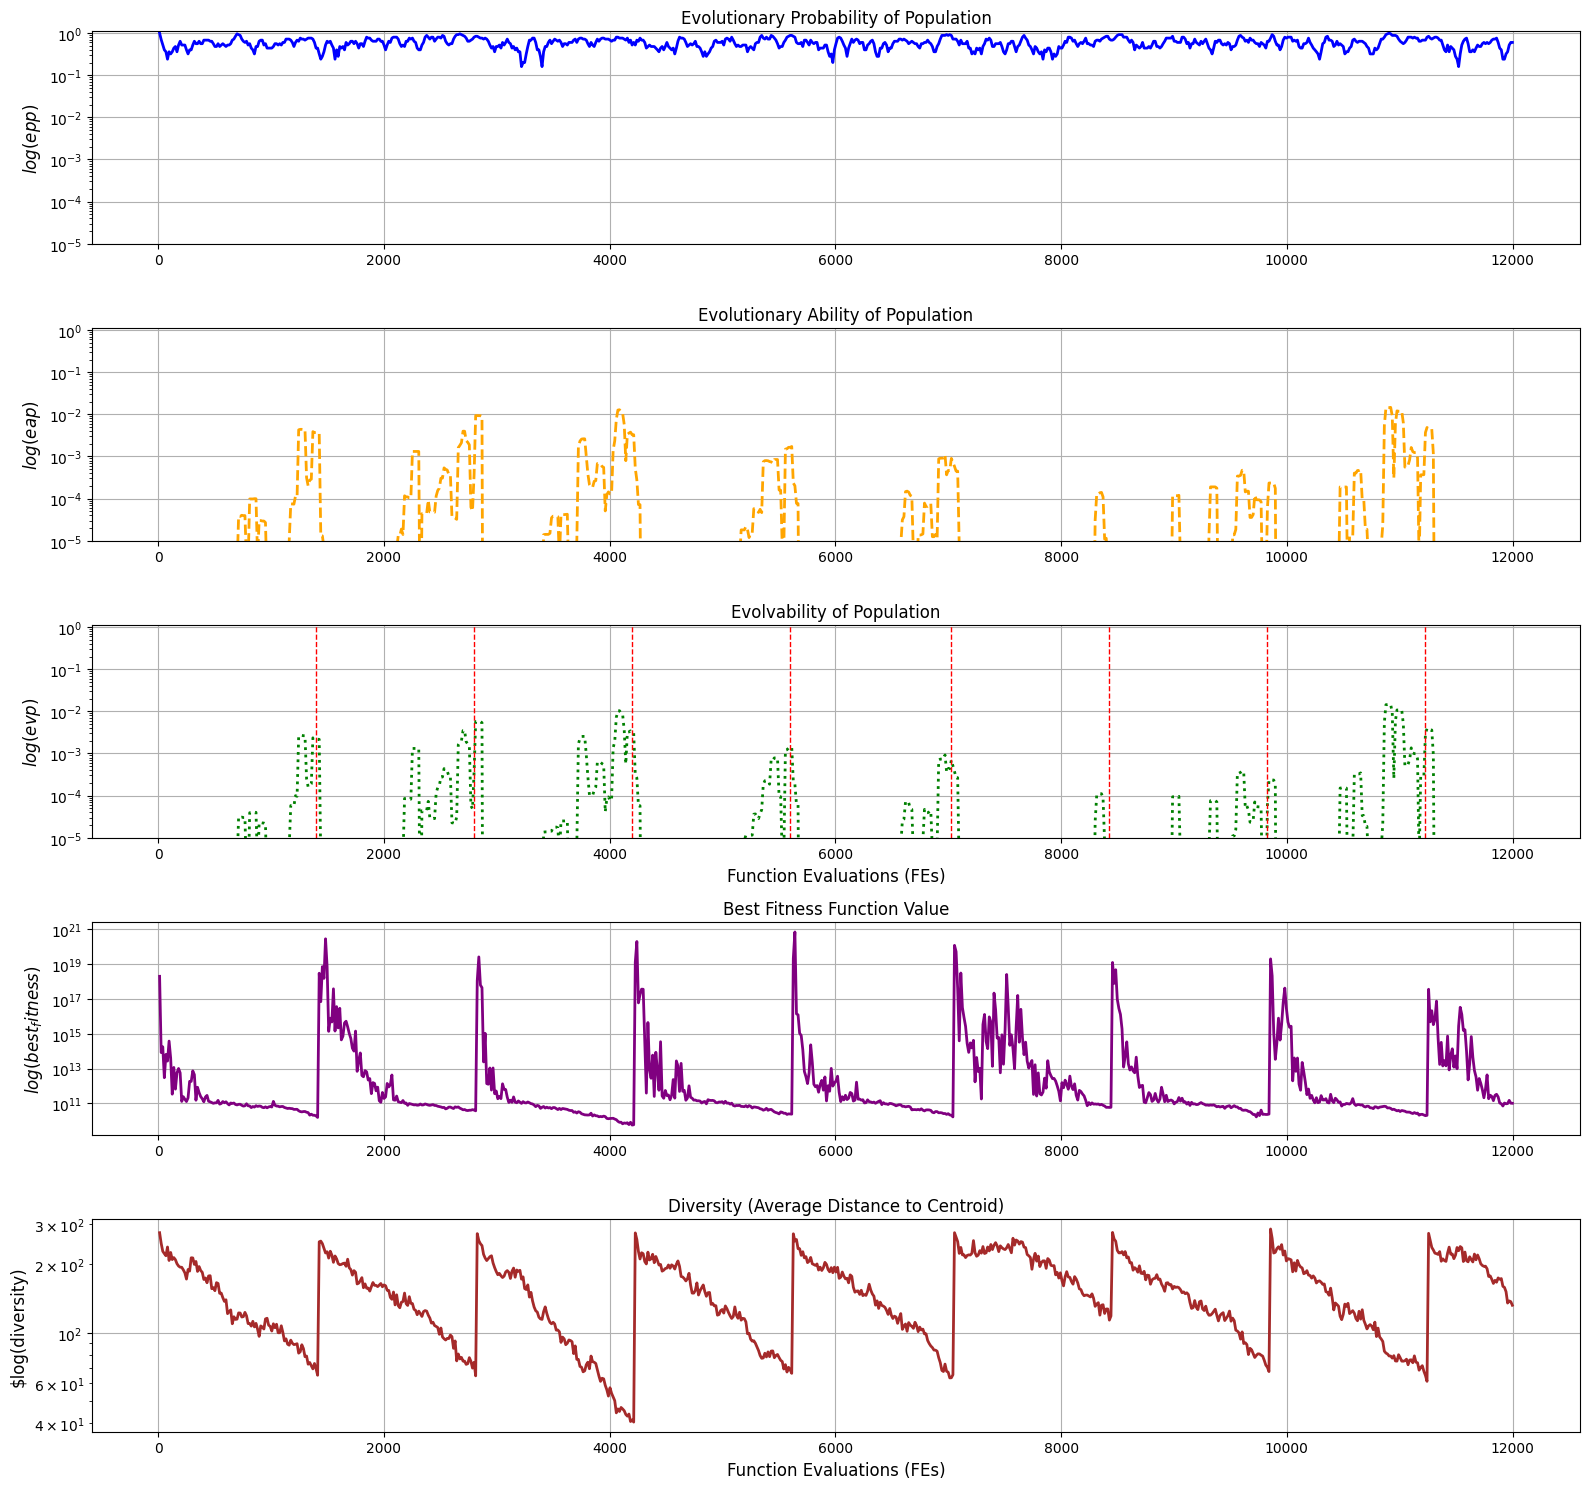

In [39]:
evp_strategy_for_f12.plot_metrics()

#### Score

In [40]:
strategy_score_for_f12 = evp_strategy_for_f12.score()

In [41]:
strategy_score_for_f12

best_fitness  mean_best_fitness  std_best_fitness  \
0  5.751755e+09       1.517901e+10      5.614664e+09   

   mean_functions_evaluations  std_functions_evaluations  
0                      1403.5                    9.26013

## Comparison

In [90]:
results = [
    ('evaluator_score_for_f1', evaluator_score_for_f1),
    ('strategy_score_for_f1', strategy_score_for_f1),
    ('evaluator_score_for_f20', evaluator_score_for_f20),
    ('strategy_score_for_f20', strategy_score_for_f20),
    ('evaluator_score_for_radar', evaluator_score_for_radar),
    ('strategy_score_for_radar', strategy_score_for_radar),
    ('evaluator_score_for_f3', evaluator_score_for_f3),
    ('strategy_score_for_f3', strategy_score_for_f3),
    ('evaluator_score_for_f7', evaluator_score_for_f7),
    ('strategy_score_for_f7', strategy_score_for_f7),
    ('evaluator_score_for_f12', evaluator_score_for_f12),
    ('strategy_score_for_f12', strategy_score_for_f12),
]

for name, df in results:
    df['name'] = name

result = pd.concat([df for _, df in results], ignore_index=True)

result.set_index('name', inplace=True)

In [91]:
result

best_fitness  mean_best_fitness  std_best_fitness  \
name                                                                           
evaluator_score_for_f1     1.700114e-26       1.591067e-25      2.239597e-25   
strategy_score_for_f1      1.996304e-10       2.023805e-10      2.750160e-12   
evaluator_score_for_f20    1.846269e+02       1.849982e+02      2.775311e-01   
strategy_score_for_f20     1.864888e+02       1.867714e+02      1.746494e-01   
evaluator_score_for_radar  3.606597e+00       3.830419e+00      1.467272e-01   
strategy_score_for_radar   3.945213e+00       3.945213e+00      0.000000e+00   
evaluator_score_for_f3    -4.093572e+02      -3.944330e+02      1.501026e+01   
strategy_score_for_f3      4.490352e+03       1.640995e+04      7.771158e+03   
evaluator_score_for_f7     1.007155e+02       1.039570e+02      2.630182e+00   
strategy_score_for_f7      1.019776e+02       1.023444e+02      3.668019e-01   
evaluator_score_for_f12   -6.209902e+02      -4.805384e+02      2.737014e+02   
strategy_score_for_f12     5.751755e+09       1.517901e+10      5.614664e+09   

                           mean_convergence_speed  std_convergence_speed  \
name                                                                       
evaluator_score_for_f1                    12000.0                    0.0   
strategy_score_for_f1                         NaN                    NaN   
evaluator_score_for_f20                   12000.0                    0.0   
strategy_score_for_f20                        NaN                    NaN   
evaluator_score_for_radar                 12000.0                    0.0   
strategy_score_for_radar                      NaN                    NaN   
evaluator_score_for_f3                    12000.0                    0.0   
strategy_score_for_f3                         NaN                    NaN   
evaluator_score_for_f7                    12000.0                    0.0   
strategy_score_for_f7                         NaN                    NaN   
evaluator_score_for_f12                   12000.0                    0.0   
strategy_score_for_f12                        NaN                    NaN   

                           mean_functions_evaluations  \
name                                                    
evaluator_score_for_f1                            NaN   
strategy_score_for_f1                          5684.0   
evaluator_score_for_f20                           NaN   
strategy_score_for_f20                         2262.4   
evaluator_score_for_radar                         NaN   
strategy_score_for_radar                      12000.0   
evaluator_score_for_f3                            NaN   
strategy_score_for_f3                          1480.5   
evaluator_score_for_f7                            NaN   
strategy_score_for_f7                          4578.0   
evaluator_score_for_f12                           NaN   
strategy_score_for_f12                         1403.5   

                           std_functions_evaluations  
name                                                  
evaluator_score_for_f1                           NaN  
strategy_score_for_f1                      28.000000  
evaluator_score_for_f20                          NaN  
strategy_score_for_f20                    140.167899  
evaluator_score_for_radar                        NaN  
strategy_score_for_radar                    0.000000  
evaluator_score_for_f3                           NaN  
strategy_score_for_f3                     120.585032  
evaluator_score_for_f7                           NaN  
strategy_score_for_f7                      98.000000  
evaluator_score_for_f12                          NaN  
strategy_score_for_f12                      9.260130

Save result

In [92]:
result.to_pickle('results/cma-es.pkl')

## Fix result

In [5]:
result = pd.read_pickle('results/cma-es.pkl')

result.loc[result['mean_convergence_speed'].isnull(), 'mean_convergence_speed'] = result['mean_functions_evaluations']
result.loc[result['std_convergence_speed'].isnull(), 'std_convergence_speed'] = result['std_functions_evaluations']

result.drop(columns=['mean_functions_evaluations', 'std_functions_evaluations'], inplace=True)

result

best_fitness  mean_best_fitness  std_best_fitness  \
name                                                                           
evaluator_score_for_f1     1.700114e-26       1.591067e-25      2.239597e-25   
strategy_score_for_f1      1.996304e-10       2.023805e-10      2.750160e-12   
evaluator_score_for_f20    1.846269e+02       1.849982e+02      2.775311e-01   
strategy_score_for_f20     1.864888e+02       1.867714e+02      1.746494e-01   
evaluator_score_for_radar  3.606597e+00       3.830419e+00      1.467272e-01   
strategy_score_for_radar   3.945213e+00       3.945213e+00      0.000000e+00   
evaluator_score_for_f3    -4.093572e+02      -3.944330e+02      1.501026e+01   
strategy_score_for_f3      4.490352e+03       1.640995e+04      7.771158e+03   
evaluator_score_for_f7     1.007155e+02       1.039570e+02      2.630182e+00   
strategy_score_for_f7      1.019776e+02       1.023444e+02      3.668019e-01   
evaluator_score_for_f12   -6.209902e+02      -4.805384e+02      2.737014e+02   
strategy_score_for_f12     5.751755e+09       1.517901e+10      5.614664e+09   

                           mean_convergence_speed  std_convergence_speed  
name                                                                      
evaluator_score_for_f1                    12000.0               0.000000  
strategy_score_for_f1                      5684.0              28.000000  
evaluator_score_for_f20                   12000.0               0.000000  
strategy_score_for_f20                     2262.4             140.167899  
evaluator_score_for_radar                 12000.0               0.000000  
strategy_score_for_radar                  12000.0               0.000000  
evaluator_score_for_f3                    12000.0               0.000000  
strategy_score_for_f3                      1480.5             120.585032  
evaluator_score_for_f7                    12000.0               0.000000  
strategy_score_for_f7                      4578.0              98.000000  
evaluator_score_for_f12                   12000.0               0.000000  
strategy_score_for_f12                     1403.5               9.260130

In [6]:
result.to_pickle('results/cma-es.pkl')